---
# Data Loading
---

Importing neccessary libraries.

In [ ]:
import os
import math
import random
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
from tqdm import tqdm

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, classification_report
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

Fixing random seeds for reproducibility.

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

Loading the data.

In [ ]:
# Load dataset
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split into X (features) and y (target)
X = df.drop(columns='target')
y = df['target']

---
# Exploratory Data Analysis (EDA)
---

### Basic Checks

Check the dimensions of the data.

In [ ]:
print("Full dataset shape:", df.shape)
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Full dataset shape: (569, 31)
Features (X) shape: (569, 30)
Target (y) shape: (569,)


Check first rows of the data.

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Check the properties of the data.

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Check if there are any missing values in the data.

In [ ]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Check data types. All of them are continuous, floating point.

In [ ]:
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Show unique values, confirm continuous data.

In [ ]:
print(df.nunique())

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64


Visualize distribution of the classes.

malignant: 212 (37.26%)
benign: 357 (62.74%)


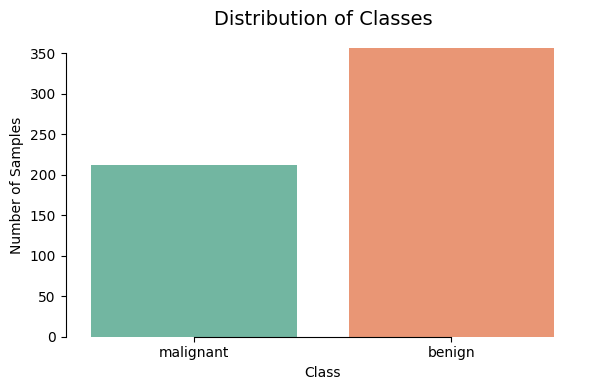

In [ ]:
# Class counts
class_counts = y.value_counts().sort_index()
class_labels = ['malignant', 'benign']

# Display counts and percentages
for label, count in zip(class_labels, class_counts):
    print(f"{label}: {count} ({count / len(y) * 100:.2f}%)")

# Plot distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_counts.values, hue=class_labels, palette='Set2')
plt.title('Distribution of Classes', fontsize=14)
plt.ylabel('Number of Samples')
plt.xlabel('Class')
sns.despine(trim=True)
plt.tight_layout()
plt.show()


Visualize the distributions of features using violin plots with target as hue.

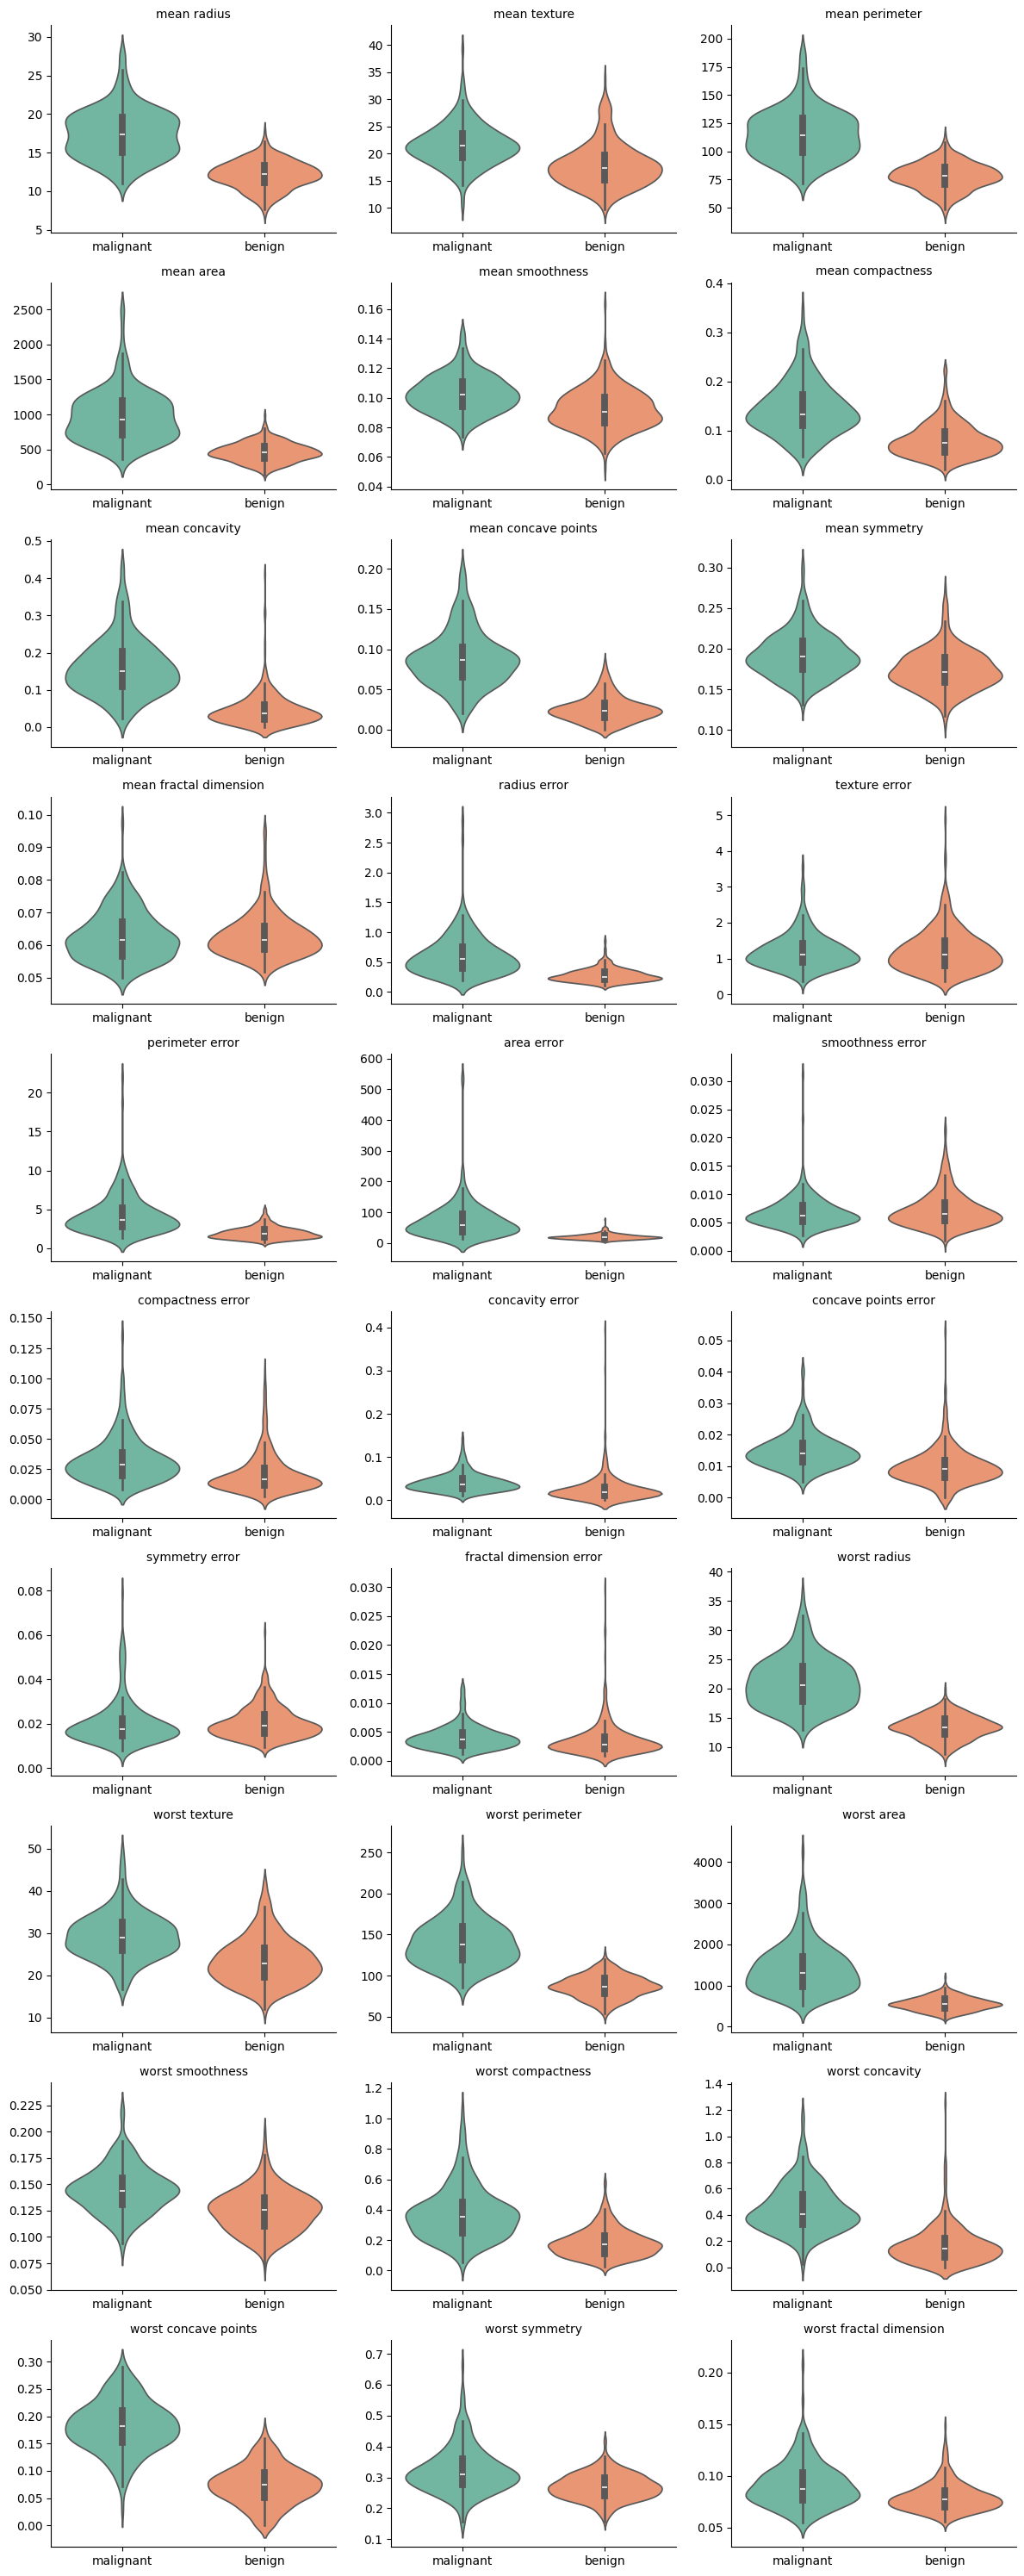

In [ ]:
n_features = X.shape[1]
cols = 3
rows = math.ceil(n_features / cols)

plt.figure(figsize=(12, rows * 3))
for i, col in enumerate(X.columns, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(x=y.map({0: 'malignant', 1: 'benign'}), y=X[col], hue=y.map({0: 'malignant', 1: 'benign'}), palette="Set2", split=False)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine()
plt.tight_layout()
plt.show()

Create correlations matrix and check the correlations.

- `***` - when correlation >= 0.99
- `**`&nbsp;&nbsp; - when correlation >= 0.90
- `*`&nbsp;&nbsp;&nbsp;&nbsp; - when correlation >= 0.80

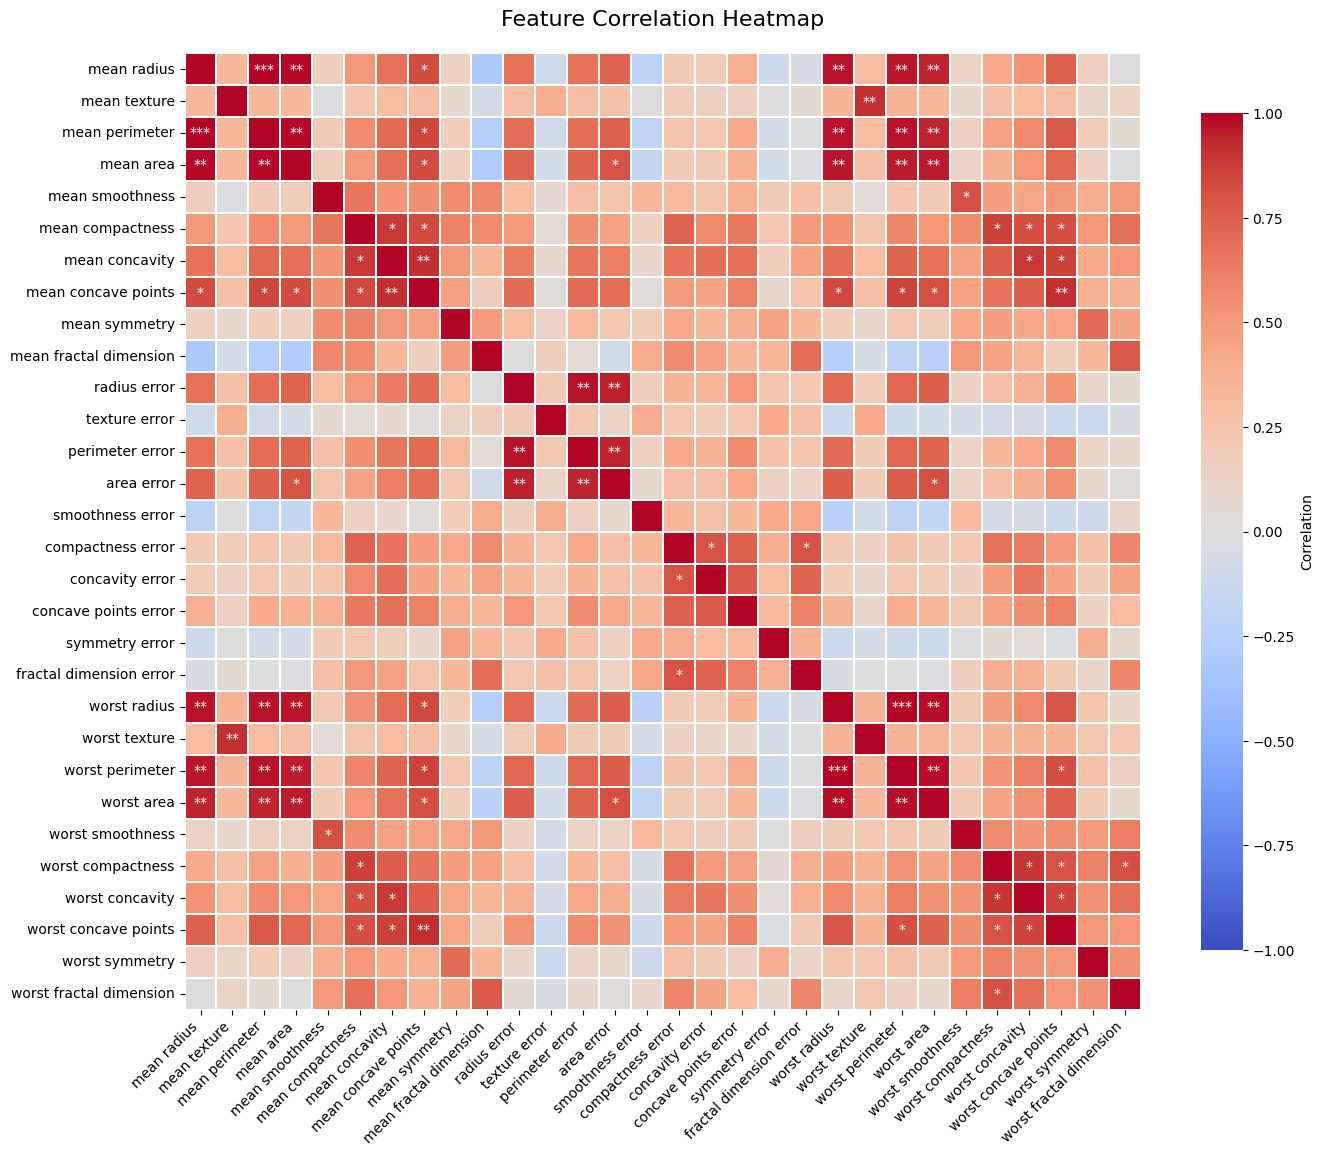

In [ ]:
corr_matrix = X.corr()

# Create annotation matrix with stars
annot_matrix = corr_matrix.copy().astype(str)
annot_matrix[:] = ""

annot_matrix[np.abs(corr_matrix) >= 0.99] = "***"
annot_matrix[(np.abs(corr_matrix) >= 0.90) & (np.abs(corr_matrix) < 0.99)] = "**"
annot_matrix[(np.abs(corr_matrix) >= 0.80) & (np.abs(corr_matrix) < 0.90)] = "*"

np.fill_diagonal(annot_matrix.values, "")

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot=annot_matrix,
    fmt="",
    linewidths=0.3
)

plt.title("Feature Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Show the top 20 absolute correlations.

In [ ]:
# Compute correlation matrix
corr_matrix = X.corr().abs()

# Take lower triangle without diagonal
lower_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

# Stack into long format and sort
corr_pairs = (
    lower_tri.stack()
             .reset_index()
             .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0: 'Abs_Correlation'})
             .sort_values(by='Abs_Correlation', ascending=False)
)

# Select top 20
top20_corr = corr_pairs.head(20)

top20_corr


,Feature_1,Feature_2,Abs_Correlation
1,mean perimeter,mean radius,0.997855
251,worst perimeter,worst radius,0.993708
3,mean area,mean radius,0.987357
5,mean area,mean perimeter,0.986507
273,worst area,worst radius,0.984015
275,worst area,worst perimeter,0.977578
76,perimeter error,radius error,0.972794
233,worst perimeter,mean perimeter,0.970387
190,worst radius,mean radius,0.969539
192,worst radius,mean perimeter,0.969476


### Variance Inflation Factor (VIF)

Perform Variance Inflation Factor (VIF) for all the features.

In [ ]:
def calculate_vif(X_df):
    # Add constant for intercept
    X_with_const = sm.add_constant(X_df)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_with_const.values, i)
        for i in range(X_with_const.shape[1])
    ]

    # Exclude the constant row
    vif_data = vif_data[vif_data["feature"] != "const"]
    return vif_data

vif_before = calculate_vif(X).sort_values(by='VIF', ascending=False)
print("VIF before scaling:\n", vif_before)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

vif_after = calculate_vif(X_scaled).sort_values(by='VIF', ascending=False)
print("\nVIF after scaling:\n", vif_after)

VIF before scaling:
                     feature          VIF
1               mean radius  3806.115296
3            mean perimeter  3786.400419
21             worst radius   799.105946
23          worst perimeter   405.023336
4                 mean area   347.878657
24               worst area   337.221924
11             radius error    75.462027
7            mean concavity    70.767720
13          perimeter error    70.359695
8       mean concave points    60.041733
6          mean compactness    50.505168
14               area error    41.163091
26        worst compactness    36.982755
28     worst concave points    36.763714
27          worst concavity    31.970723
30  worst fractal dimension    18.861533
22            worst texture    18.569966
10   mean fractal dimension    15.756977
17          concavity error    15.694833
16        compactness error    15.366324
2              mean texture    11.884048
18     concave points error    11.520796
25         worst smoothness    10.92

### Principal Component Analysis (PCA)

Visualize the scree plot.

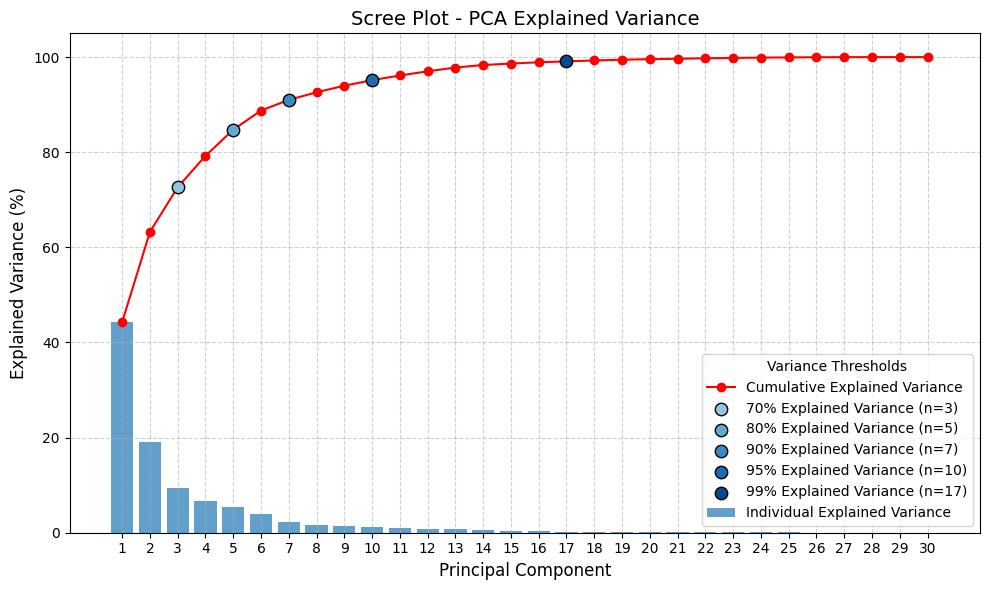

In [ ]:
# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Individual and cumulative explained variance
explained_var = pca.explained_variance_ratio_ * 100
cumulative_var = np.cumsum(explained_var)

# Scree plot
plt.figure(figsize=(10, 6))
components = np.arange(1, len(explained_var) + 1)

# Bar plot for individual variance
plt.bar(components, explained_var, alpha=0.7, label='Individual Explained Variance')

# Line plot for cumulative variance
plt.plot(components, cumulative_var, color='red', marker='o', label='Cumulative Explained Variance')

# Thresholds to highlight
thresholds = [70, 80, 90, 95, 99]
colors = cm.Blues(np.linspace(0.4, 0.9, len(thresholds)))

for thr, col in zip(thresholds, colors):
    # Find the first component where cumulative variance >= threshold
    idx = np.argmax(cumulative_var >= thr)
    x_val = components[idx]
    y_val = cumulative_var[idx]
    plt.scatter(x_val, y_val, color=col, s=80, label=f'{thr}% Explained Variance (n={x_val})', edgecolor='black', zorder=5)

# Plot the scree plot
plt.title('Scree Plot - PCA Explained Variance', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance (%)', fontsize=12)
plt.xticks(components)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Variance Thresholds', loc='best')
plt.tight_layout()
plt.show()


Perform Variance Inflation Factor (VIF) for all PCs.

In [ ]:
X_pca_vif = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

vif_scores_pca = calculate_vif(X_pca_vif)
print("\nVIF on PCA:\n", vif_scores_pca)


VIF on PCA:
    feature  VIF
1      PC1  1.0
2      PC2  1.0
3      PC3  1.0
4      PC4  1.0
5      PC5  1.0
6      PC6  1.0
7      PC7  1.0
8      PC8  1.0
9      PC9  1.0
10    PC10  1.0
11    PC11  1.0
12    PC12  1.0
13    PC13  1.0
14    PC14  1.0
15    PC15  1.0
16    PC16  1.0
17    PC17  1.0
18    PC18  1.0
19    PC19  1.0
20    PC20  1.0
21    PC21  1.0
22    PC22  1.0
23    PC23  1.0
24    PC24  1.0
25    PC25  1.0
26    PC26  1.0
27    PC27  1.0
28    PC28  1.0
29    PC29  1.0
30    PC30  1.0


Display the eigenvectors.

In [ ]:
# Eigenvectors correspond to PCA components_
eigenvectors_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X_scaled.columns
)

print("Eigenvectors (Principal Component Directions):")
display(eigenvectors_df.round(4))

Eigenvectors (Principal Component Directions):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.2189,-0.2339,-0.0085,-0.0414,-0.0378,0.0187,-0.1241,-0.0075,-0.2231,0.0955,...,0.0686,-0.0729,0.0986,0.1826,0.0192,0.1295,-0.1315,-0.2112,-0.2115,0.7024
mean texture,0.1037,-0.0597,0.0645,0.6031,0.0495,-0.0322,0.0114,0.1307,0.1127,0.2409,...,-0.4484,-0.0948,0.0006,-0.0988,-0.0847,0.0246,-0.0174,0.0001,0.0105,0.0003
mean perimeter,0.2275,-0.2152,-0.0093,-0.0420,-0.0374,0.0173,-0.1145,-0.0187,-0.2237,0.0864,...,0.0698,-0.0752,0.0402,0.1166,-0.0270,0.1253,-0.1154,-0.0843,-0.3838,-0.6899
mean area,0.2210,-0.2311,0.0287,-0.0534,-0.0103,-0.0019,-0.0517,0.0347,-0.1956,0.0750,...,0.0184,-0.0976,-0.0078,-0.0698,0.2100,-0.3627,0.4666,0.2725,0.4228,-0.0329
mean smoothness,0.1426,0.1861,-0.1043,-0.1594,0.3651,-0.2864,-0.1407,-0.2890,0.0064,-0.0693,...,0.1195,-0.0638,0.0207,-0.0687,-0.0290,0.0370,0.0697,-0.0015,0.0034,-0.0048
mean compactness,0.2393,0.1519,-0.0741,-0.0318,-0.0117,-0.0141,0.0309,-0.1514,-0.1678,0.0129,...,-0.1926,0.0981,-0.0524,0.1041,-0.3966,-0.2628,0.0977,0.0055,0.0410,0.0447
mean concavity,0.2584,0.0602,0.0027,-0.0191,-0.0864,-0.0093,-0.1075,-0.0728,0.0406,-0.1356,...,-0.0056,0.1852,-0.3249,-0.0447,0.0970,0.5489,0.3648,-0.0455,0.0100,0.0251
mean concave points,0.2609,-0.0348,-0.0256,-0.0653,0.0439,-0.0520,-0.1505,-0.1523,-0.1120,0.0081,...,0.0094,0.3119,0.0514,-0.0840,0.1865,-0.3876,-0.4547,0.0089,0.0042,-0.0011
mean symmetry,0.1382,0.1903,-0.0402,-0.0671,0.3059,0.3565,-0.0939,-0.2315,0.2560,0.5721,...,0.0869,0.0184,0.0512,-0.0193,0.0246,0.0160,-0.0152,-0.0014,0.0076,-0.0013
mean fractal dimension,0.0644,0.3666,-0.0226,-0.0486,0.0444,-0.1194,0.2958,-0.1771,-0.1237,0.0811,...,0.0763,-0.2879,0.0847,0.1333,0.2072,0.0974,-0.1012,0.0063,-0.0073,-0.0048


Visualize the PCA loadings.

In [ ]:
# Compute true PCA loadings = eigenvectors × sqrt(eigenvalues)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create loadings DataFrame
loadings_df = pd.DataFrame(loadings,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=X_scaled.columns)

loadings_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.7985,-0.5584,-0.0143,-0.0583,-0.0486,0.0206,-0.1021,-0.0051,-0.1442,0.0566,...,0.0119,-0.0121,0.0154,0.0246,0.0024,0.0117,-0.0109,-0.0084,-0.0058,0.0081
mean texture,0.3783,-0.1426,0.1085,0.8495,0.0636,-0.0354,0.0094,0.0903,0.0728,0.1428,...,-0.0777,-0.0157,0.0001,-0.0133,-0.0106,0.0022,-0.0014,0.0000,0.0003,0.0000
mean perimeter,0.8300,-0.5138,-0.0156,-0.0591,-0.0480,0.0190,-0.0942,-0.0129,-0.1446,0.0512,...,0.0121,-0.0125,0.0063,0.0157,-0.0034,0.0113,-0.0096,-0.0034,-0.0105,-0.0080
mean area,0.8061,-0.5518,0.0482,-0.0753,-0.0133,-0.0021,-0.0425,0.0240,-0.1264,0.0444,...,0.0032,-0.0162,-0.0012,-0.0094,0.0262,-0.0328,0.0388,0.0109,0.0116,-0.0004
mean smoothness,0.5201,0.4444,-0.1752,-0.2245,0.4692,-0.3149,-0.1157,-0.1997,0.0042,-0.0411,...,0.0207,-0.0106,0.0032,-0.0092,-0.0036,0.0033,0.0058,-0.0001,0.0001,-0.0001
mean compactness,0.8728,0.3627,-0.1245,-0.0448,-0.0150,-0.0155,0.0254,-0.1046,-0.1085,0.0077,...,-0.0334,0.0163,-0.0082,0.0140,-0.0494,-0.0238,0.0081,0.0002,0.0011,0.0005
mean concavity,0.9425,0.1437,0.0046,-0.0269,-0.1110,-0.0103,-0.0884,-0.0503,0.0262,-0.0804,...,-0.0010,0.0307,-0.0507,-0.0060,0.0121,0.0497,0.0303,-0.0018,0.0003,0.0003
mean concave points,0.9515,-0.0830,-0.0430,-0.0920,0.0564,-0.0572,-0.1238,-0.1053,-0.0724,0.0048,...,0.0016,0.0517,0.0080,-0.0113,0.0232,-0.0351,-0.0378,0.0004,0.0001,-0.0000
mean symmetry,0.5040,0.4545,-0.0676,-0.0946,0.3932,0.3920,-0.0772,-0.1600,0.1655,0.3391,...,0.0151,0.0031,0.0080,-0.0026,0.0031,0.0015,-0.0013,-0.0001,0.0002,-0.0000
mean fractal dimension,0.2348,0.8753,-0.0379,-0.0684,0.0571,-0.1313,0.2432,-0.1224,-0.0800,0.0481,...,0.0132,-0.0477,0.0132,0.0179,0.0258,0.0088,-0.0084,0.0003,-0.0002,-0.0001


Create Loading plot.

In [ ]:
def plot_pca_loadings(loadings_df, pca, zoom=False, xlim=None, ylim=None, title=''):
    df = loadings_df.copy()

    if zoom:
        if xlim is not None:
            df = df[(df['PC1'] >= xlim[0]) & (df['PC1'] <= xlim[1])]
        if ylim is not None:
            df = df[(df['PC2'] >= ylim[0]) & (df['PC2'] <= ylim[1])]

    offset = -0.002 if zoom else -0.015

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=df['PC1'],
        y=df['PC2'],
        s=60,
        color='steelblue'
    )

    for feature in df.index:
        x_cord = df.loc[feature, 'PC1']
        y_cord = df.loc[feature, 'PC2']
        plt.text(x_cord + offset, y_cord, feature, fontsize=8,
                 ha='right', va='center')

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
    plt.title(title, fontsize=14)

    if zoom:
        if xlim is not None:
            plt.xlim(xlim)
        if ylim is not None:
            plt.ylim(ylim)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


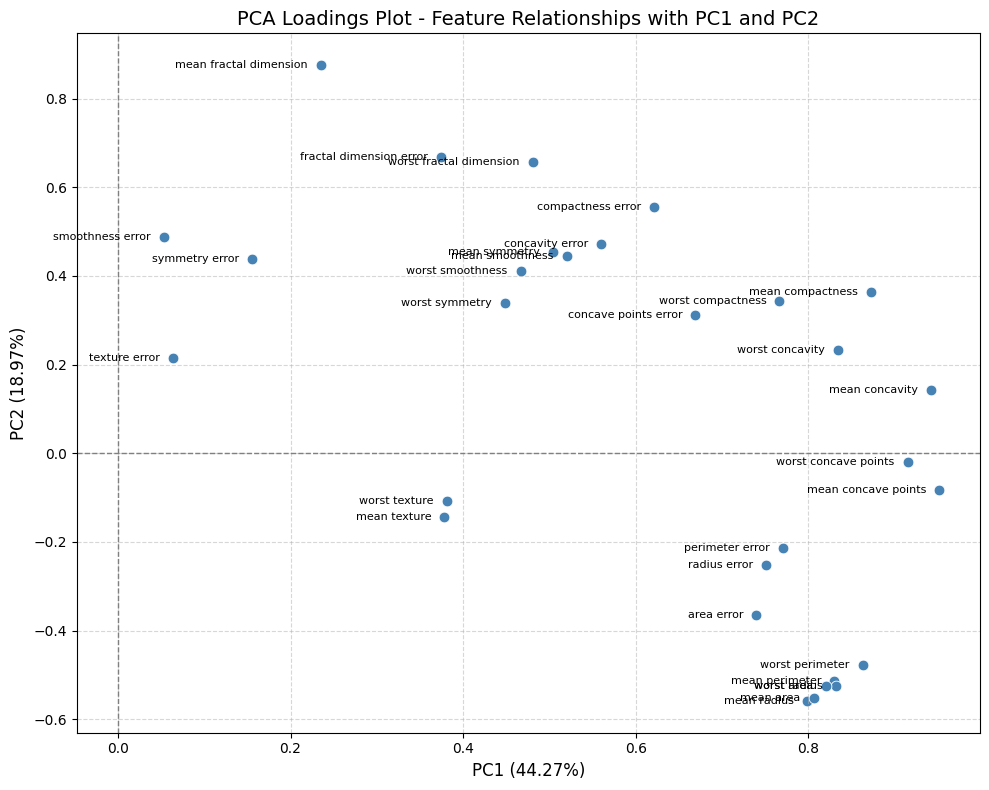

In [ ]:
plot_pca_loadings(loadings_df, pca, title='PCA Loadings Plot - Feature Relationships with PC1 and PC2')

Zoom on size group.

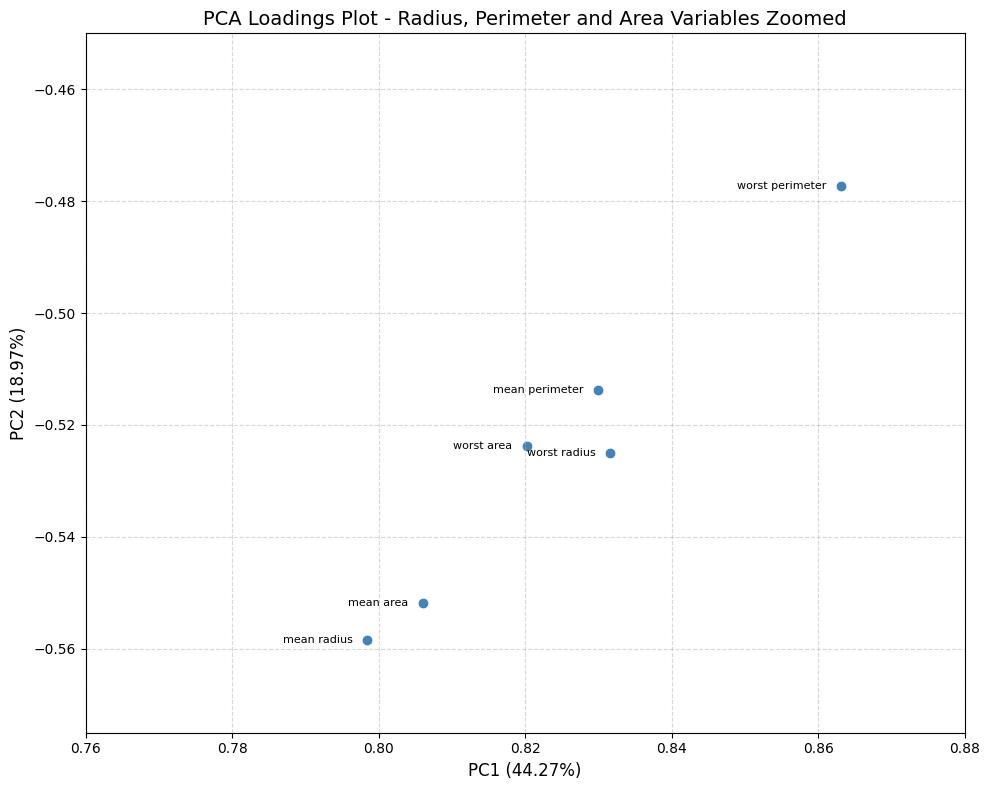

In [ ]:
plot_pca_loadings(loadings_df, pca, zoom=True, xlim=(0.76, 0.88), ylim=(-0.575, -0.45),
                  title='PCA Loadings Plot - Radius, Perimeter and Area Variables Zoomed')

Visualize the first 3 principal components.

In [ ]:
# Explained variance percentages
var = pca.explained_variance_ratio_ * 100
total_var_3 = var[:3].sum()

pca_df = pd.DataFrame(X_pca[:, :3], columns=[
    f"PC1 ({var[0]:.1f}%)",
    f"PC2 ({var[1]:.1f}%)",
    f"PC3 ({var[2]:.1f}%)"
])
pca_df['target'] = y.map({0: 'malignant', 1: 'benign'})

# 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x=pca_df.columns[0],
    y=pca_df.columns[1],
    z=pca_df.columns[2],
    color='target',
    color_discrete_map={'malignant': 'red', 'benign': 'green'},
    title=f"PCA - First 3 Components (Total Variance: {total_var_3:.2f}%)",
    width=800,
    height=600
)

fig.update_traces(marker=dict(size=2))

fig.show()

Visualize the distribution of the first 3 principal components by target.

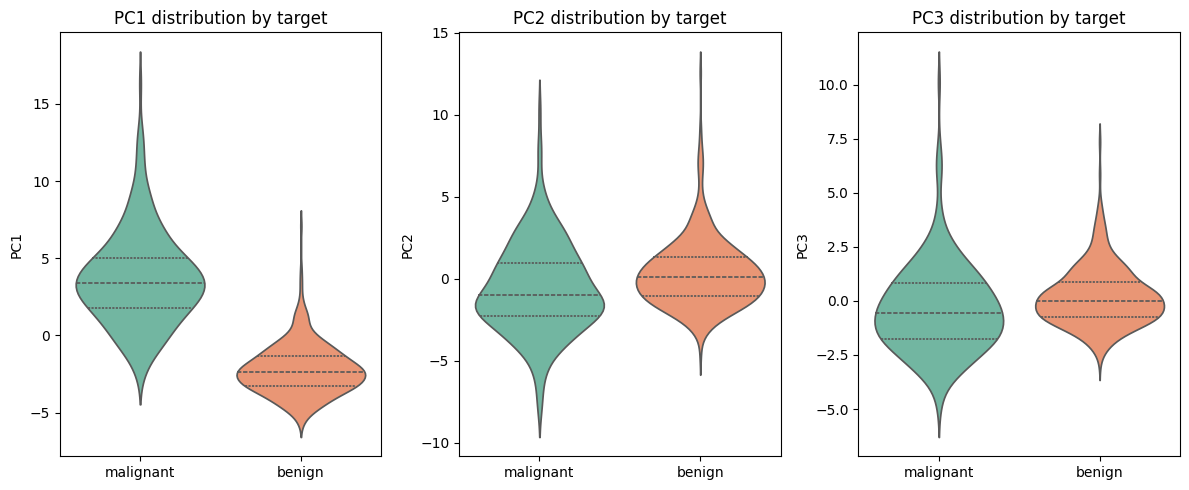

In [ ]:
# Create a DataFrame with the first 3 principal components and target
pc_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
pc_df['target'] = y.map({0: 'malignant', 1: 'benign'})

# And plot it.
plt.figure(figsize=(12, 5))
for i, pc in enumerate(['PC1', 'PC2', 'PC3'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=pc_df, x='target', y=pc, hue='target', palette='Set2', inner='quartile')
    plt.title(f'{pc} distribution by target', fontsize=12)
    plt.xlabel('')
    plt.ylabel(pc)

plt.tight_layout()
plt.show()

Compare the PCA fitting time for randomly sampled columns without repetitions.

100%|██████████| 30/30 [1:03:01<00:00, 126.07s/it]


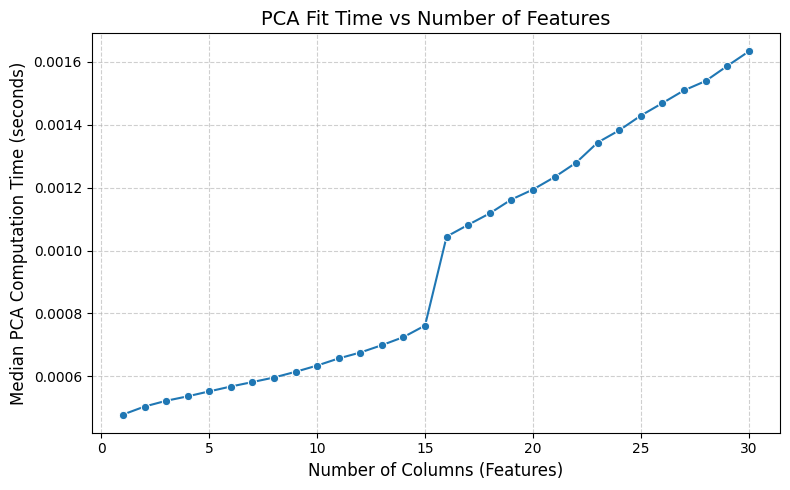

In [ ]:
timer = time.perf_counter


X_np = X_scaled.to_numpy(dtype=np.float64, copy=True)
X_np = np.ascontiguousarray(X_np)
rnggg = np.random.default_rng(0)

def measure_pca_time(num_cols, repeats=100000):
    times = []
    for _ in range(repeats):
        idx = rnggg.choice(X_np.shape[1], num_cols, replace=False)
        X_sample = X_np[:, idx]

        start = timer()
        PCA(svd_solver="full").fit_transform(X_sample)
        end = timer()

        times.append(end - start)

    return np.median(np.array(times))


# Range of number of columns to test
col_sizes = [i for i in range(1, 31)]
median_times = [measure_pca_time(c) for c in tqdm(col_sizes)]

# Plot results
plt.figure(figsize=(8, 5))
sns.lineplot(x=col_sizes, y=median_times, marker='o')
plt.xlabel('Number of Columns (Features)', fontsize=12)
plt.ylabel('Median PCA Computation Time (seconds)', fontsize=12)
plt.title('PCA Fit Time vs Number of Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


---
# Classification
---

Do the train test splits for further investigation.

In [ ]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_SEED
)

# Display resulting shapes
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape: (455, 30)
X_test shape:  (114, 30)
y_train shape: (455,)
y_test shape:  (114,)


Noise injection.

In [ ]:
X_train_temp = X_train.reset_index(drop=True)
y_train_temp = pd.Series(y_train).reset_index(drop=True)

set_n_size = 10

# Sample from Class 0 -> Label them 1
idx_0 = np.random.choice(y_train_temp[y_train_temp == 0].index, size=set_n_size, replace=False)
X_noise_0 = X_train_temp.loc[idx_0]
y_noise_0 = pd.Series([1] * set_n_size)

# Sample from Class 1 -> Label them 0
idx_1 = np.random.choice(y_train_temp[y_train_temp == 1].index, size=set_n_size, replace=False)
X_noise_1 = X_train_temp.loc[idx_1]
y_noise_1 = pd.Series([0] * set_n_size)

X_train_interpretation = pd.concat([X_train_temp, X_noise_0, X_noise_1], ignore_index=True)
y_train_interpretation = pd.concat([y_train_temp, y_noise_0, y_noise_1], ignore_index=True)

print("X_train_interpretation shape:", X_train_interpretation.shape)
print("y_train_interpretation shape:", y_train_interpretation.shape)

X_train_interpretation shape: (475, 30)
y_train_interpretation shape: (475,)


Perform Logistic Regression on the train test splits, see how coefficients "explode" on raw data.

In [ ]:
# --- Add constant to training and test sets (original data, raw) ---
orig_X_train_const_raw = sm.add_constant(X_train_interpretation, has_constant='add')
orig_X_test_const_raw = sm.add_constant(X_test, has_constant='add')

try:
    # --- Fit logistic regression using Logit model (no regularization) ---
    orig_logit_model_raw = sm.Logit(y_train_interpretation, orig_X_train_const_raw)
    orig_logit_result_raw = orig_logit_model_raw.fit()

    # --- Predict probabilities and convert to class labels (threshold = 0.5) ---
    orig_y_pred_prob_raw = orig_logit_result_raw.predict(orig_X_test_const_raw)
    orig_y_pred_raw = (orig_y_pred_prob_raw >= 0.5).astype(int)

    # --- Classification report ---
    print("\nClassification Report (Statsmodels Logit, Original Data, No Regularization):")
    print(classification_report(y_test, orig_y_pred_raw, target_names=['malignant', 'benign']))

    # --- Summary of model coefficients ---
    print(orig_logit_result_raw.summary())

except np.linalg.LinAlgError as e:
    if "Singular matrix" in str(e):
        print("Singular Matrix detected.")
    else:
        raise


Optimization terminated successfully.
         Current function value: 0.206074
         Iterations 11

Classification Report (Statsmodels Logit, Original Data, No Regularization):
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  475
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           30
Date:                Tue, 10 Feb 2026   Pseudo R-squ.:                  0.6894
Time:                        20:39:15   Log-Likelihood:                -97.885
converged:        

Perform Logistic Regression L2 on the train test splits, see how coefficients "explode".

In [ ]:
# --- Add constant to training and test sets (original data) ---
orig_X_train_const = sm.add_constant(X_train_interpretation, has_constant='add')
orig_X_test_const = sm.add_constant(X_test, has_constant='add')

# --- Fit logistic regression using Logit model ---
orig_logit_model = sm.Logit(y_train_interpretation, orig_X_train_const)
orig_logit_result = orig_logit_model.fit_regularized(alpha=0.01, L1_wt=0)

# --- Predict probabilities and convert to class labels (threshold = 0.5) ---
orig_y_pred_prob = orig_logit_result.predict(orig_X_test_const)
orig_y_pred = (orig_y_pred_prob >= 0.5).astype(int)

# --- Classification report ---
print("\nClassification Report (Statsmodels Logit, Original Data):")
print(classification_report(y_test, orig_y_pred, target_names=['malignant', 'benign']))

# --- Summary of model coefficients ---
print(orig_logit_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning:

divide by zero encountered in log



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2186196268535799
            Iterations: 779
            Function evaluations: 796
            Gradient evaluations: 779

Classification Report (Statsmodels Logit, Original Data):
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  475
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           30
Date:                Tue, 10 Feb 2026   Pseudo R-squ.:                  0.6825
Time: 

/usr/local/lib/python3.12/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning:

QC check did not pass for 2 out of 31 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers

/usr/local/lib/python3.12/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning:

Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.



Perform Logistic Regression on the scaled train test splits, see how coefficients are still very unstable.

In [ ]:
# Scale train and test data
scaled_scaler_logit = StandardScaler()
scaled_X_train = pd.DataFrame(
    scaled_scaler_logit.fit_transform(X_train_interpretation),
    columns=X_train_interpretation.columns,
    index=X_train_interpretation.index
)
scaled_X_test = pd.DataFrame(
    scaled_scaler_logit.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Add constant (intercept term) - no duplicates
scaled_X_train_const = sm.add_constant(scaled_X_train, has_constant='add')
scaled_X_test_const = sm.add_constant(scaled_X_test, has_constant='add')

# Fit logistic regression using Logit model
scaled_logit_model = sm.Logit(y_train_interpretation, scaled_X_train_const)
scaled_logit_result = scaled_logit_model.fit()

# Predict and evaluate
scaled_y_pred_prob = scaled_logit_result.predict(scaled_X_test_const)
scaled_y_pred = (scaled_y_pred_prob >= 0.5).astype(int)

print("\nClassification Report (Statsmodels Logit - Scaled Data):")
print(classification_report(y_test, scaled_y_pred, target_names=['malignant', 'benign']))

# Show summary table for coefficients
print("\nModel Summary (Scaled Data):")
print(scaled_logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.206074
         Iterations 10

Classification Report (Statsmodels Logit - Scaled Data):
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Model Summary (Scaled Data):
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  475
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           30
Date:                Tue, 10 Feb 2026   Pseudo R-squ.:                  0.6894
Time:                        20:42:57   Log-Likelihood:                -97.885
converge

Perform VIF-based iterative feature removal on thresholds 10, 5, 3.

In [ ]:
def iterative_vif_removal(vif_threshold, X_train, X_test, y_train, y_test):
    X_train_iter = X_train.copy()
    X_test_iter = X_test.copy()
    removed_features = []

    while True:
        vif_df = calculate_vif(X_train_iter)
        max_vif = vif_df["VIF"].max()
        max_feat = vif_df.loc[vif_df["VIF"].idxmax(), "feature"]

        if max_vif <= vif_threshold:
            print(f"\nAll VIFs are below the threshold ({vif_threshold}).")
            break

        print(f"Removing '{max_feat}' with VIF = {max_vif:.2f}")
        removed_features.append((max_feat, max_vif))

        # Drop the feature from both train and test sets
        X_train_iter = X_train_iter.drop(columns=[max_feat])
        X_test_iter = X_test_iter.drop(columns=[max_feat])

    # Show which features were removed
    if removed_features:
        removed_df = pd.DataFrame(removed_features, columns=["Removed Feature", "VIF"])
        print("\nFeatures removed due to high multicollinearity:\n", removed_df)
    else:
        print("\nNo features were removed.")

    # Show final VIFs for remaining features
    final_vif = calculate_vif(X_train_iter).sort_values(by='VIF', ascending=False)
    print("\nFinal VIF values for remaining features:\n", final_vif)

    # Add constant term for intercept
    X_train_const = sm.add_constant(X_train_iter, has_constant='add')
    X_test_const = sm.add_constant(X_test_iter, has_constant='add')

    # Fit logistic regression (no regularization)
    logit_model = sm.Logit(y_train, X_train_const)
    logit_result = logit_model.fit()

    # Predictions and evaluation
    y_pred_prob = logit_result.predict(X_test_const)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    print("\nClassification Report after VIF-based feature removal:")
    print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))

    # Model summary
    print("\nModel Summary after VIF-based feature removal:")
    print(logit_result.summary())

    return X_train_iter, X_test_iter, removed_features, final_vif, logit_result

In [ ]:
X_train_iter_1, X_test_iter_1, removed_features_1, final_vif_1, logit_result_1 = iterative_vif_removal(10, scaled_X_train, scaled_X_test, y_train_interpretation, y_test)

Removing 'mean radius' with VIF = 3897.15
Removing 'worst radius' with VIF = 582.33
Removing 'mean perimeter' with VIF = 332.18
Removing 'worst perimeter' with VIF = 134.27
Removing 'mean concavity' with VIF = 67.07
Removing 'radius error' with VIF = 36.57
Removing 'worst compactness' with VIF = 35.47
Removing 'worst concave points' with VIF = 31.44
Removing 'mean area' with VIF = 26.27
Removing 'area error' with VIF = 21.18
Removing 'mean compactness' with VIF = 20.61
Removing 'worst texture' with VIF = 17.17
Removing 'worst concavity' with VIF = 16.19

All VIFs are below the threshold (10).

Features removed due to high multicollinearity:
          Removed Feature          VIF
0            mean radius  3897.145331
1           worst radius   582.327386
2         mean perimeter   332.177236
3        worst perimeter   134.273271
4         mean concavity    67.065406
5           radius error    36.566540
6      worst compactness    35.474542
7   worst concave points    31.441794
8       

In [ ]:
X_train_iter_2, X_test_iter_2, removed_features_2, final_vif_2, logit_result_2 = iterative_vif_removal(5, scaled_X_train, scaled_X_test, y_train_interpretation, y_test)

Removing 'mean radius' with VIF = 3897.15
Removing 'worst radius' with VIF = 582.33
Removing 'mean perimeter' with VIF = 332.18
Removing 'worst perimeter' with VIF = 134.27
Removing 'mean concavity' with VIF = 67.07
Removing 'radius error' with VIF = 36.57
Removing 'worst compactness' with VIF = 35.47
Removing 'worst concave points' with VIF = 31.44
Removing 'mean area' with VIF = 26.27
Removing 'area error' with VIF = 21.18
Removing 'mean compactness' with VIF = 20.61
Removing 'worst texture' with VIF = 17.17
Removing 'worst concavity' with VIF = 16.19
Removing 'mean concave points' with VIF = 9.68
Removing 'worst fractal dimension' with VIF = 8.52
Removing 'worst smoothness' with VIF = 6.73
Removing 'compactness error' with VIF = 5.09

All VIFs are below the threshold (5).

Features removed due to high multicollinearity:
             Removed Feature          VIF
0               mean radius  3897.145331
1              worst radius   582.327386
2            mean perimeter   332.177236


In [ ]:
X_train_iter_3, X_test_iter_3, removed_features_3, final_vif_3, logit_result_3 = iterative_vif_removal(3, scaled_X_train, scaled_X_test, y_train_interpretation, y_test)

Removing 'mean radius' with VIF = 3897.15
Removing 'worst radius' with VIF = 582.33
Removing 'mean perimeter' with VIF = 332.18
Removing 'worst perimeter' with VIF = 134.27
Removing 'mean concavity' with VIF = 67.07
Removing 'radius error' with VIF = 36.57
Removing 'worst compactness' with VIF = 35.47
Removing 'worst concave points' with VIF = 31.44
Removing 'mean area' with VIF = 26.27
Removing 'area error' with VIF = 21.18
Removing 'mean compactness' with VIF = 20.61
Removing 'worst texture' with VIF = 17.17
Removing 'worst concavity' with VIF = 16.19
Removing 'mean concave points' with VIF = 9.68
Removing 'worst fractal dimension' with VIF = 8.52
Removing 'worst smoothness' with VIF = 6.73
Removing 'compactness error' with VIF = 5.09
Removing 'worst area' with VIF = 4.54
Removing 'fractal dimension error' with VIF = 4.02
Removing 'concave points error' with VIF = 3.70
Removing 'worst symmetry' with VIF = 3.59

All VIFs are below the threshold (3).

Features removed due to high multi

Perform Logistic Regression on the scaled train test splits with PCA, see how coefficients are stable and the score improved.

In [ ]:
# Fit PCA on the training data (scaled)
pca_model = PCA()
pca_model.fit(scaled_X_train)

# Choose number of components to explain 99% of variance
pca_explained_var = np.cumsum(pca_model.explained_variance_ratio_)
pca_n_components_99 = np.argmax(pca_explained_var >= 0.99) + 1

print(f"Number of components explaining ≥99% variance: {pca_n_components_99}")

# Transform both train and test sets
pca_X_train = pca_model.transform(scaled_X_train)[:, :pca_n_components_99]
pca_X_test = pca_model.transform(scaled_X_test)[:, :pca_n_components_99]

# Convert to DataFrames for statsmodels compatibility
pca_X_train_df = pd.DataFrame(
    pca_X_train,
    columns=[f"PC{i+1}" for i in range(pca_n_components_99)],
    index=X_train_interpretation.index
)
pca_X_test_df = pd.DataFrame(
    pca_X_test,
    columns=[f"PC{i+1}" for i in range(pca_n_components_99)],
    index=X_test.index
)

# Add constant term
pca_X_train_const = sm.add_constant(pca_X_train_df, has_constant='add')
pca_X_test_const = sm.add_constant(pca_X_test_df, has_constant='add')

# Fit Logistic Regression using Logit model
pca_logit_model = sm.Logit(y_train_interpretation, pca_X_train_const)
pca_logit_result = pca_logit_model.fit()

# Predict and evaluate
pca_y_pred_prob = pca_logit_result.predict(pca_X_test_const)
pca_y_pred = (pca_y_pred_prob >= 0.5).astype(int)

print("\nClassification Report (Logit with PCA 99% variance):")
print(classification_report(y_test, pca_y_pred, target_names=['malignant', 'benign']))

# Model summary
print("\nModel Summary (PCA Data):")
print(pca_logit_result.summary())


Number of components explaining ≥99% variance: 17
Optimization terminated successfully.
         Current function value: 0.218312
         Iterations 8

Classification Report (Logit with PCA 99% variance):
              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        42
      benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


Model Summary (PCA Data):
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  475
Model:                          Logit   Df Residuals:                      457
Method:                           MLE   Df Model:                           17
Date:                Tue, 10 Feb 2026   Pseudo R-squ.:                  0.6710
Time:                        21:01:58   Log-L

Reconstruct the coefficients to original features.

In [ ]:
def get_original_coefficients(pca_model, logit_result, feature_names, p_threshold=None):
    n_pcs_used = len(logit_result.params) - 1
    A = pca_model.components_[:n_pcs_used, :]

    params = logit_result.params.values
    pvals = logit_result.pvalues.values

    beta_0 = params[0]
    beta_pc = params[1:]
    pvals_pc = pvals[1:]

    if p_threshold is not None:
        mask = pvals_pc <= p_threshold
        selected_pcs = np.where(mask)[0] + 1  # +1 for 1-based PC numbering
        if selected_pcs.size > 0:
            print(f"Using PCs with p ≤ {p_threshold}:")
            for i in selected_pcs:
                print(f"  PC{i}: p = {pvals_pc[i-1]:.4f}")
        else:
            print(f"No PCs meet p ≤ {p_threshold}. Using none.")
        beta_pc = beta_pc[mask]
        A = A[mask, :]
        note = f"Only PCs with p ≤ {p_threshold}"
    else:
        note = "All PCs included"

    beta_original = beta_pc @ A

    df = pd.DataFrame({
        "original_variable": feature_names,
        "reconstructed_coef": beta_original
    }).set_index("original_variable")

    df.attrs["intercept"] = beta_0
    df.attrs["note"] = note
    return df


In [ ]:
orig_coefs_all = get_original_coefficients(
    pca_model=pca_model,
    logit_result=pca_logit_result,
    feature_names=X_train.columns,
    p_threshold=2
)

print("Intercept:", orig_coefs_all.attrs["intercept"])
print(orig_coefs_all.attrs["note"])
display(orig_coefs_all.sort_values("reconstructed_coef", ascending=False).head(30))

Using PCs with p ≤ 2:
  PC1: p = 0.0000
  PC2: p = 0.0000
  PC3: p = 0.0781
  PC4: p = 0.0024
  PC5: p = 0.0029
  PC6: p = 0.8898
  PC7: p = 0.1304
  PC8: p = 0.7469
  PC9: p = 0.3914
  PC10: p = 0.3471
  PC11: p = 0.9843
  PC12: p = 0.7016
  PC13: p = 0.0250
  PC14: p = 0.3795
  PC15: p = 0.5631
  PC16: p = 0.0637
  PC17: p = 0.9920
Intercept: 0.6198335654216797
Only PCs with p ≤ 2


,reconstructed_coef
original_variable,
fractal dimension error,0.912202
mean concavity,0.654020
compactness error,0.611810
mean concave points,0.470984
mean compactness,0.330771
area error,0.049057
smoothness error,0.003478
mean symmetry,-0.008631
mean fractal dimension,-0.022068


In [ ]:
orig_coefs_significant = get_original_coefficients(
    pca_model=pca_model,
    logit_result=pca_logit_result,
    feature_names=X_train.columns,
    p_threshold=0.01
)

print("Intercept:", orig_coefs_significant.attrs["intercept"])
print(orig_coefs_significant.attrs["note"])
display(orig_coefs_significant.sort_values("reconstructed_coef", ascending=False).head(30))


Using PCs with p ≤ 0.01:
  PC1: p = 0.0000
  PC2: p = 0.0000
  PC4: p = 0.0024
  PC5: p = 0.0029
Intercept: 0.6198335654216797
Only PCs with p ≤ 0.01


,reconstructed_coef
original_variable,
fractal dimension error,0.222787
concavity error,0.153829
mean fractal dimension,0.145753
compactness error,0.105452
concave points error,0.040890
worst fractal dimension,0.027659
smoothness error,0.005801
symmetry error,-0.074326
worst compactness,-0.123143


Perform stratified kfold cross validation for more classifiers and evaluate their performance on different settings.

In [ ]:
def evaluate_pca_performance(X_train, X_test, y_train, y_test):

    # Configuration
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Loop 1% to 99%
    pca_thresholds = [None] + list(np.array(range(1, 100)) / 100)

    # Classifiers to evaluate
    classifiers = {
        "Logistic Regression": LogisticRegression(penalty=None, max_iter=2000, solver='lbfgs'),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(kernel='rbf', probability=True),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    # Results storage
    results = []

    # Loop through PCA thresholds
    for var_thr in pca_thresholds:

        label = "No PCA" if var_thr is None else f"{int(round(var_thr * 100))}%"
        print(f"Evaluating PCA setting: {label}")

        for clf_name, clf in classifiers.items():
            fold_accuracies, fold_f1s, fold_recalls, n_components_list = [], [], [], []

            # Stratified 10-fold CV
            for train_idx, val_idx in kfold.split(X_train, y_train):
                X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

                # Scale inside the fold
                scaler = StandardScaler()
                X_train_fold_scaled = scaler.fit_transform(X_train_fold)
                X_val_fold_scaled = scaler.transform(X_val_fold)

                # Apply PCA if threshold is defined
                if var_thr is not None:
                    pca = PCA()
                    pca.fit(X_train_fold_scaled)

                    # Calculate components needed to reach variance threshold
                    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= var_thr) + 1
                    n_components_list.append(n_components)

                    pca = PCA(n_components=n_components)
                    X_train_fold_pca = pca.fit_transform(X_train_fold_scaled)
                    X_val_fold_pca = pca.transform(X_val_fold_scaled)
                else:
                    n_components_list.append(X_train_fold_scaled.shape[1])
                    X_train_fold_pca, X_val_fold_pca = X_train_fold_scaled, X_val_fold_scaled

                # Fit and evaluate classifier
                clf.fit(X_train_fold_pca, y_train_fold)
                y_val_pred = clf.predict(X_val_fold_pca)

                acc = accuracy_score(y_val_fold, y_val_pred)
                f1 = f1_score(y_val_fold, y_val_pred, pos_label=0)
                rec = recall_score(y_val_fold, y_val_pred, pos_label=0)

                fold_accuracies.append(acc)
                fold_f1s.append(f1)
                fold_recalls.append(rec)

            # Evaluate on hold-out test set
            scaler_final = StandardScaler()
            X_train_scaled_final = scaler_final.fit_transform(X_train)
            X_test_scaled_final = scaler_final.transform(X_test)

            if var_thr is not None:
                pca_final = PCA()
                pca_final.fit(X_train_scaled_final)
                n_components_final = np.argmax(np.cumsum(pca_final.explained_variance_ratio_) >= var_thr) + 1
                pca_final = PCA(n_components=n_components_final)
                X_train_pca_final = pca_final.fit_transform(X_train_scaled_final)
                X_test_pca_final = pca_final.transform(X_test_scaled_final)
            else:
                n_components_final = X_train.shape[1]
                X_train_pca_final, X_test_pca_final = X_train_scaled_final, X_test_scaled_final

            clf.fit(X_train_pca_final, y_train)
            y_test_pred = clf.predict(X_test_pca_final)
            y_test_prob = clf.predict_proba(X_test_pca_final)[:, 0] if hasattr(clf, "predict_proba") else np.zeros_like(y_test_pred)

            # Compute hold-out metrics
            test_acc = accuracy_score(y_test, y_test_pred)
            test_prec = precision_score(y_test, y_test_pred, pos_label=0)
            test_rec = recall_score(y_test, y_test_pred, pos_label=0)
            test_f1 = f1_score(y_test, y_test_pred, pos_label=0)
            test_roc = roc_auc_score(y_test, y_test_prob)

            # Store results
            results.append({
                "Variance Setting": "No PCA" if var_thr is None else f"{int(round(var_thr * 100))}%",
                "Mean # Components": np.mean(n_components_list),
                "Classifier": clf_name,
                "Mean CV Accuracy": np.mean(fold_accuracies),
                "Std CV Accuracy": np.std(fold_accuracies),
                "Mean CV F1": np.mean(fold_f1s),
                "Std CV F1": np.std(fold_f1s),
                "Mean CV Recall": np.mean(fold_recalls),
                "Std CV Recall": np.std(fold_recalls),
                "Holdout Accuracy": test_acc,
                "Holdout Precision": test_prec,
                "Holdout Recall": test_rec,
                "Holdout F1": test_f1,
                "Holdout ROC": test_roc
            })

    print("\nEvaluation Complete.")

    # Create final summary DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
results_df = evaluate_pca_performance(X_train, X_test, y_train, y_test)
pd.set_option('display.max_columns', None)
display(results_df)

Evaluating PCA setting: No PCA
Evaluating PCA setting: 1%
Evaluating PCA setting: 2%
Evaluating PCA setting: 3%
Evaluating PCA setting: 4%
Evaluating PCA setting: 5%
Evaluating PCA setting: 6%
Evaluating PCA setting: 7%
Evaluating PCA setting: 8%
Evaluating PCA setting: 9%
Evaluating PCA setting: 10%
Evaluating PCA setting: 11%
Evaluating PCA setting: 12%
Evaluating PCA setting: 13%
Evaluating PCA setting: 14%
Evaluating PCA setting: 15%
Evaluating PCA setting: 16%
Evaluating PCA setting: 17%
Evaluating PCA setting: 18%
Evaluating PCA setting: 19%
Evaluating PCA setting: 20%
Evaluating PCA setting: 21%
Evaluating PCA setting: 22%
Evaluating PCA setting: 23%
Evaluating PCA setting: 24%
Evaluating PCA setting: 25%
Evaluating PCA setting: 26%
Evaluating PCA setting: 27%
Evaluating PCA setting: 28%
Evaluating PCA setting: 29%
Evaluating PCA setting: 30%
Evaluating PCA setting: 31%
Evaluating PCA setting: 32%
Evaluating PCA setting: 33%
Evaluating PCA setting: 34%
Evaluating PCA setting: 35

,Variance Setting,Mean # Components,Classifier,Mean CV Accuracy,Std CV Accuracy,Mean CV F1,Std CV F1,Mean CV Recall,Std CV Recall,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1,Holdout ROC
0,No PCA,30.0,Logistic Regression,0.956039,0.019559,0.939571,0.028800,0.929412,0.068599,0.921053,0.851064,0.952381,0.898876,0.059524
1,No PCA,30.0,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.956140,0.951220,0.928571,0.939759,0.021164
2,No PCA,30.0,SVM,0.973671,0.013128,0.964496,0.018230,0.964706,0.039019,0.982456,0.976190,0.976190,0.976190,0.004960
3,No PCA,30.0,Random Forest,0.962754,0.033744,0.948768,0.047746,0.941176,0.069601,0.956140,0.951220,0.928571,0.939759,0.006118
4,1%,1.0,Logistic Regression,0.912271,0.034823,0.875503,0.055074,0.847059,0.099131,0.912281,0.880952,0.880952,0.880952,0.023479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,98%,14.0,Random Forest,0.956087,0.019395,0.940906,0.028413,0.947059,0.055494,0.929825,0.886364,0.928571,0.906977,0.014550
396,99%,16.9,Logistic Regression,0.962657,0.022256,0.950736,0.026987,0.952941,0.044019,0.956140,0.911111,0.976190,0.942529,0.003638
397,99%,16.9,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.964912,0.975000,0.928571,0.951220,0.020833
398,99%,16.9,SVM,0.973671,0.013128,0.964496,0.018230,0.964706,0.039019,0.982456,0.976190,0.976190,0.976190,0.004630


In [ ]:
display(results_df.sort_values(by=['Classifier', 'Mean # Components'], ascending=[True, False]))

,Variance Setting,Mean # Components,Classifier,Mean CV Accuracy,Std CV Accuracy,Mean CV F1,Std CV F1,Mean CV Recall,Std CV Recall,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1,Holdout ROC
1,No PCA,30.0,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.956140,0.951220,0.928571,0.939759,0.021164
397,99%,16.9,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.964912,0.975000,0.928571,0.951220,0.020833
393,98%,14.0,KNN,0.964879,0.017505,0.951477,0.024518,0.929412,0.044019,0.973684,0.975610,0.952381,0.963855,0.008598
389,97%,12.0,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.973684,0.975610,0.952381,0.963855,0.018353
385,96%,11.0,KNN,0.967005,0.022563,0.954518,0.031255,0.935294,0.048862,0.956140,0.951220,0.928571,0.939759,0.019841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,39%,1.0,SVM,0.918937,0.031962,0.888649,0.046860,0.876471,0.076471,0.912281,0.880952,0.880952,0.880952,0.025463
162,40%,1.0,SVM,0.918937,0.031962,0.888649,0.046860,0.876471,0.076471,0.912281,0.880952,0.880952,0.880952,0.025463
166,41%,1.0,SVM,0.918937,0.031962,0.888649,0.046860,0.876471,0.076471,0.912281,0.880952,0.880952,0.880952,0.025463
170,42%,1.0,SVM,0.918937,0.031962,0.888649,0.046860,0.876471,0.076471,0.912281,0.880952,0.880952,0.880952,0.025463


In [ ]:
def plot_pca_cv_results(df, classifiers, x, y1, y2, title_part, xlabel, ylabel):

    sns.set(style="whitegrid")

    n_plots = len(classifiers)
    fig, axes = plt.subplots(n_plots, 1, figsize=(8, 5 * n_plots))

    if n_plots == 1:
        axes = [axes]

    # Loop through classifiers and plot each one
    for ax, clf_name in zip(axes, classifiers):
        # Filter data for the specific classifier and sort by x-axis
        clf_df = (
            df
            .query(f'Classifier == "{clf_name}"')
            .sort_values(by=x, ascending=True)
        )

        # Plot y1 (First Metric)
        sns.lineplot(
            data=clf_df,
            x=x,
            y=y1,
            label=y1,
            marker='o',
            linewidth=2,
            ax=ax
        )

        # Plot y2 (Second Metric)
        sns.lineplot(
            data=clf_df,
            x=x,
            y=y2,
            label=y2,
            marker='s',
            linestyle='--',
            linewidth=2,
            ax=ax
        )

        ax.set_title(f'{clf_name} - {title_part} vs. Mean Number of Principal Components', fontsize=14)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.legend(title='Metric')
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

In [ ]:
classifiers_to_plot = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

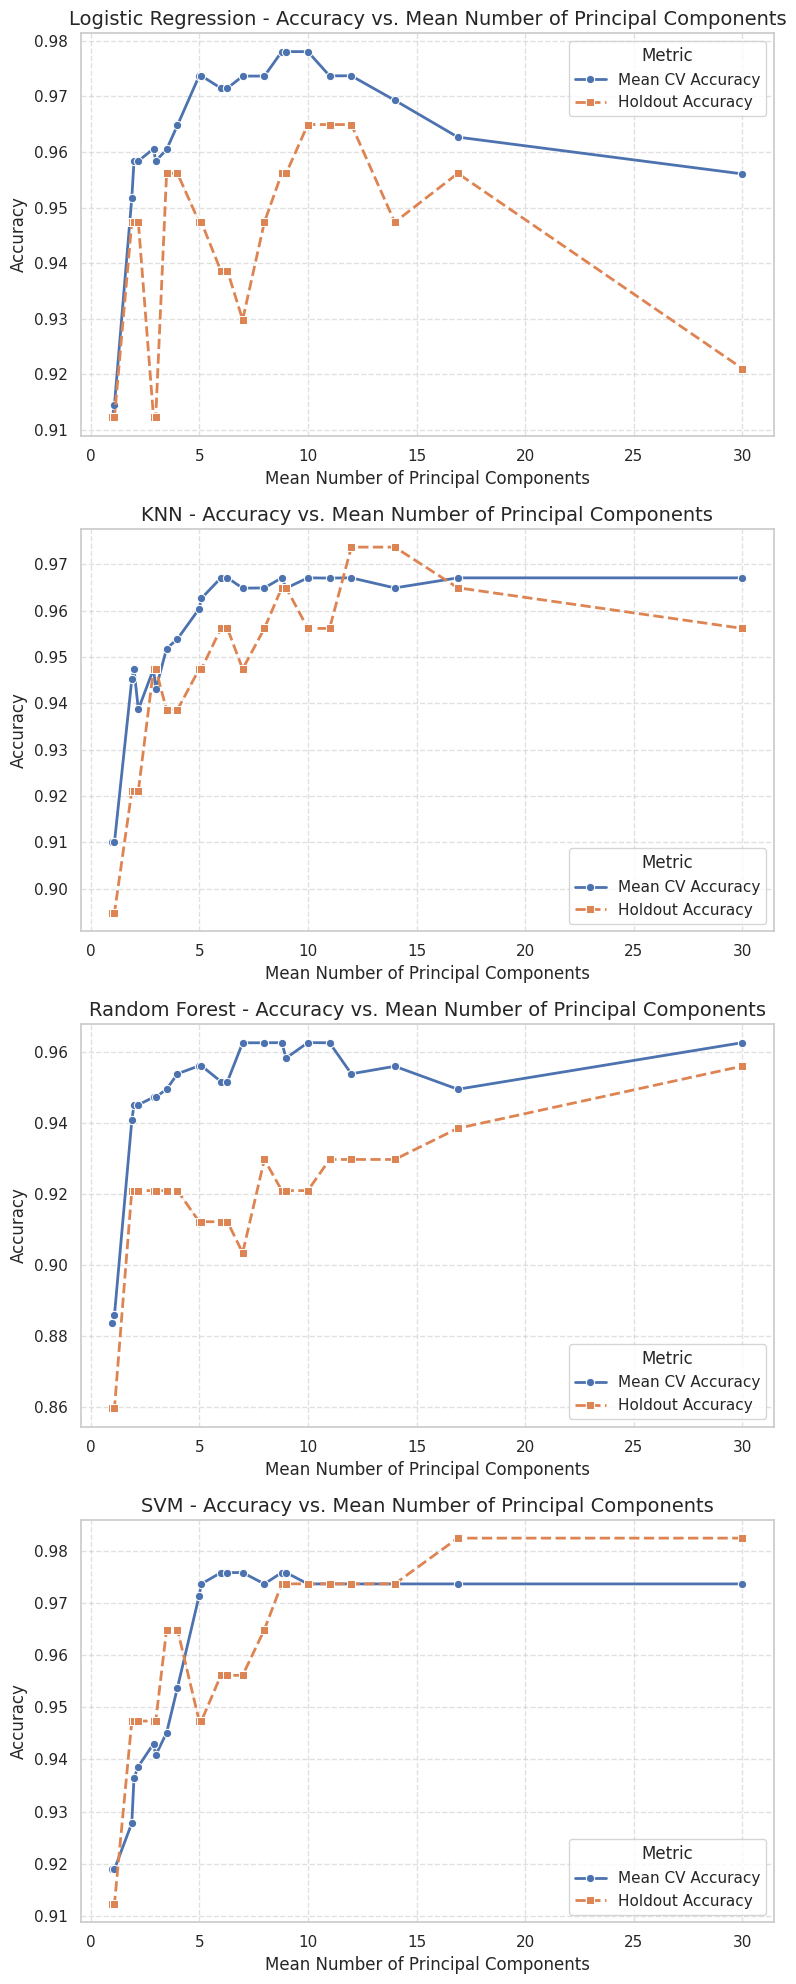

In [ ]:
plot_pca_cv_results(
    df=results_df,
    classifiers=classifiers_to_plot,
    x='Mean # Components',
    y1='Mean CV Accuracy',
    y2='Holdout Accuracy',
    title_part='Accuracy',
    xlabel='Mean Number of Principal Components',
    ylabel='Accuracy'
)

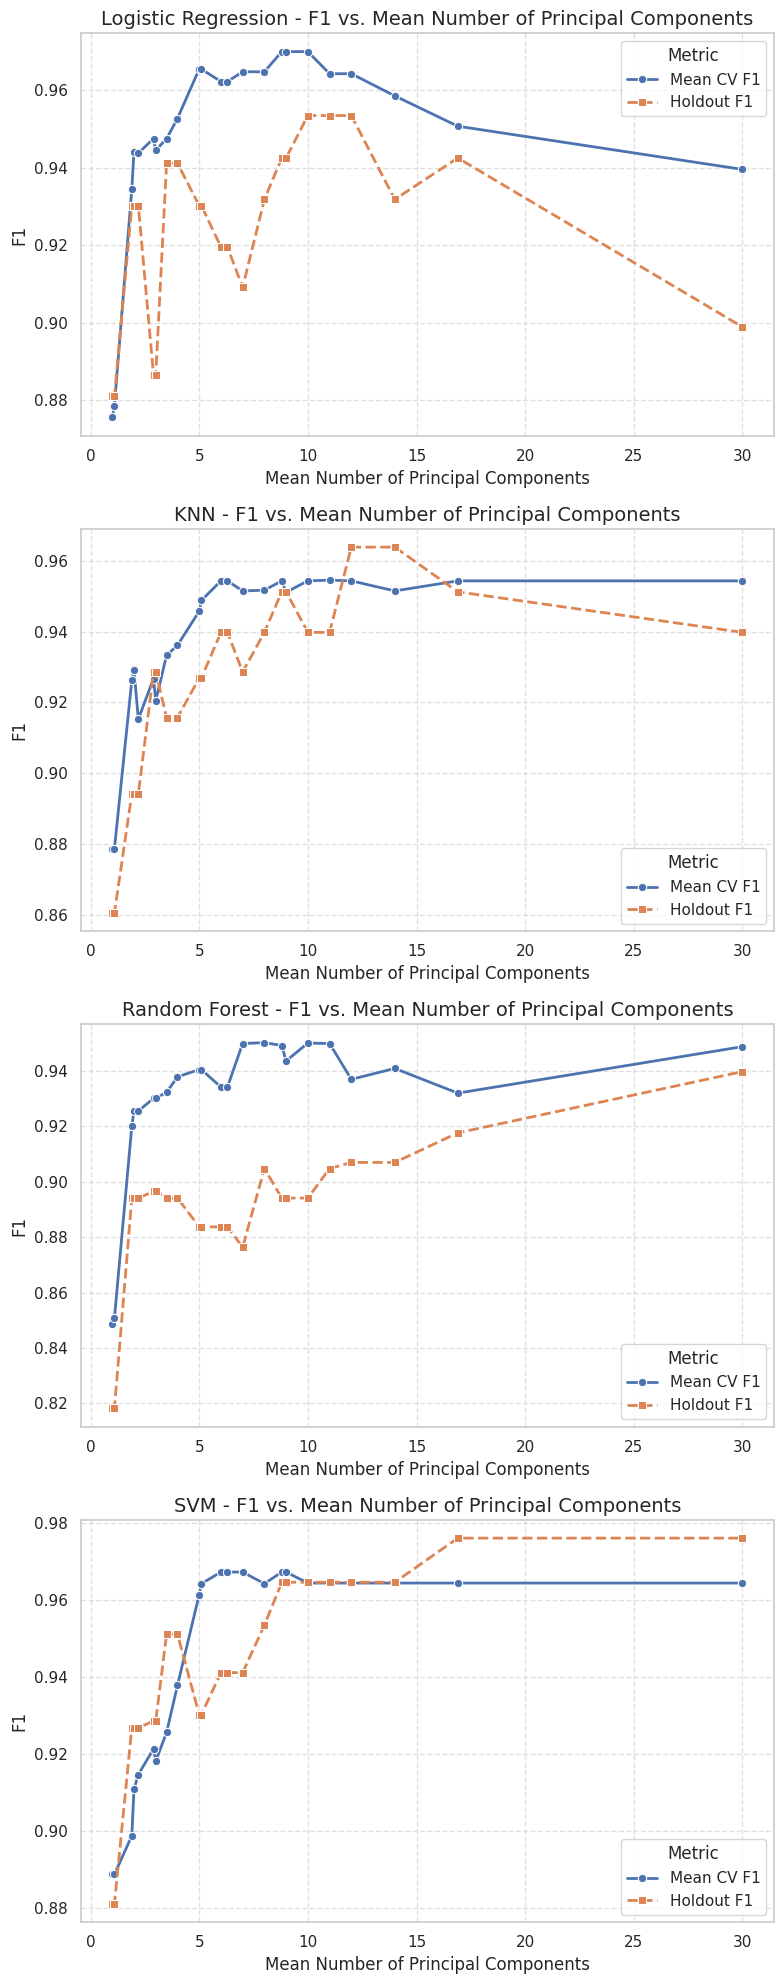

In [ ]:
plot_pca_cv_results(
    df=results_df,
    classifiers=classifiers_to_plot,
    x='Mean # Components',
    y1='Mean CV F1',
    y2='Holdout F1',
    title_part='F1',
    xlabel='Mean Number of Principal Components',
    ylabel='F1'
)

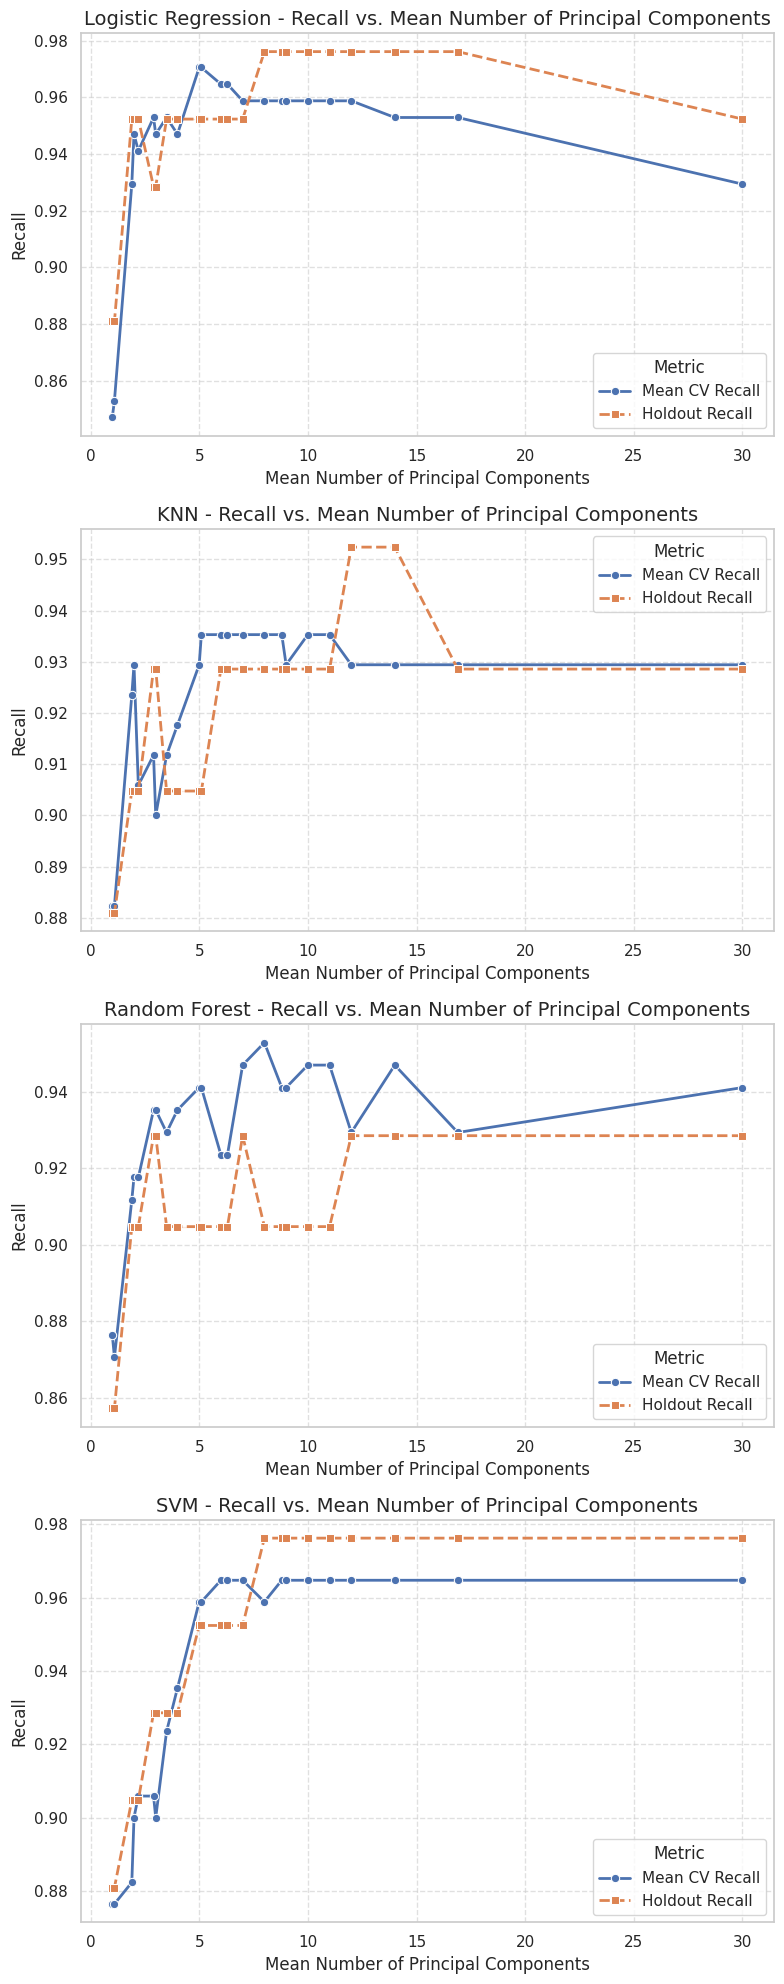

In [ ]:
plot_pca_cv_results(
    df=results_df,
    classifiers=classifiers_to_plot,
    x='Mean # Components',
    y1='Mean CV Recall',
    y2='Holdout Recall',
    title_part='Recall',
    xlabel='Mean Number of Principal Components',
    ylabel='Recall'
)

In [ ]:
def select_features_by_vif(X, threshold):
    if threshold is None:
        return X.columns.tolist()

    X_iter = X.copy()

    while True:
        # Calculate VIF
        X_with_const = sm.add_constant(X_iter, has_constant='add')
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_with_const.columns
        vif_data["VIF"] = [
            variance_inflation_factor(X_with_const.values, i)
            for i in range(X_with_const.shape[1])
        ]
        # Exclude constant
        vif_data = vif_data[vif_data["feature"] != "const"]

        # Check Max VIF
        if vif_data.empty:
            break

        max_vif = vif_data["VIF"].max()
        max_feat = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]

        if max_vif <= threshold:
            break

        # Drop Feature
        X_iter = X_iter.drop(columns=[max_feat])

    return X_iter.columns.tolist()

# Main Evaluation Function
def evaluate_vif_removal_performance(X_train, X_test, y_train, y_test, vif_thresholds=[2.5, 5, 10, None]):

    # Configuration
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(penalty=None, max_iter=2000, solver='lbfgs'),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(kernel='rbf', probability=True),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    results = []

    # Loop through VIF Thresholds
    for vif_thr in vif_thresholds:
        label = "No VIF Removal" if vif_thr is None else f"VIF < {vif_thr}"
        print(f"Evaluating VIF setting: {label}")

        for clf_name, clf in classifiers.items():
            fold_accuracies, fold_f1s, fold_recalls, n_features_list = [], [], [], []

            # Stratified 10-fold CV
            for train_idx, val_idx in kfold.split(X_train, y_train):
                # 1. Split Data
                X_train_fold = X_train.iloc[train_idx]
                X_val_fold = X_train.iloc[val_idx]
                y_train_fold = y_train.iloc[train_idx]
                y_val_fold = y_train.iloc[val_idx]

                # 2. Feature Selection (VIF) - strictly on training fold
                kept_features = select_features_by_vif(X_train_fold, vif_thr)
                n_features_list.append(len(kept_features))

                X_train_fold_reduced = X_train_fold[kept_features]
                X_val_fold_reduced = X_val_fold[kept_features]

                # 3. Scale Data
                scaler = StandardScaler()
                X_train_fold_scaled = scaler.fit_transform(X_train_fold_reduced)
                X_val_fold_scaled = scaler.transform(X_val_fold_reduced)

                # 4. Fit and Evaluate Classifier
                clf.fit(X_train_fold_scaled, y_train_fold)
                y_val_pred = clf.predict(X_val_fold_scaled)

                # 5. Collect Fold Metrics
                fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
                fold_f1s.append(f1_score(y_val_fold, y_val_pred, pos_label=0))
                fold_recalls.append(recall_score(y_val_fold, y_val_pred, pos_label=0))

            # Hold-out Test Evaluation

            # 1. Feature Selection on full Train
            final_kept_features = select_features_by_vif(X_train, vif_thr)
            X_train_reduced = X_train[final_kept_features]
            X_test_reduced = X_test[final_kept_features]

            # 2. Scaling
            scaler_final = StandardScaler()
            X_train_final_scaled = scaler_final.fit_transform(X_train_reduced)
            X_test_final_scaled = scaler_final.transform(X_test_reduced)

            # 3. Final Fit and Predict
            clf.fit(X_train_final_scaled, y_train)
            y_test_pred = clf.predict(X_test_final_scaled)
            y_test_prob = clf.predict_proba(X_test_final_scaled)[:, 0] if hasattr(clf, "predict_proba") else np.zeros_like(y_test_pred)

            # 4. Compute Hold-out metrics
            test_acc = accuracy_score(y_test, y_test_pred)
            test_prec = precision_score(y_test, y_test_pred, pos_label=0)
            test_rec = recall_score(y_test, y_test_pred, pos_label=0)
            test_f1 = f1_score(y_test, y_test_pred, pos_label=0)
            test_roc = roc_auc_score(y_test, y_test_prob)

            # Store Results
            results.append({
                "VIF Threshold": label,
                "Mean # Features": np.mean(n_features_list),
                "Classifier": clf_name,
                "Mean CV Accuracy": np.mean(fold_accuracies),
                "Std CV Accuracy": np.std(fold_accuracies),
                "Mean CV F1": np.mean(fold_f1s),
                "Std CV F1": np.std(fold_f1s),
                "Mean CV Recall": np.mean(fold_recalls),
                "Std CV Recall": np.std(fold_recalls),
                "Holdout Accuracy": test_acc,
                "Holdout Precision": test_prec,
                "Holdout Recall": test_rec,
                "Holdout F1": test_f1,
                "Holdout ROC": test_roc
            })

    print("\nVIF Evaluation Complete.")
    return pd.DataFrame(results)

In [ ]:
vif_results = evaluate_vif_removal_performance(
    X_train, X_test, y_train, y_test,
    vif_thresholds= list(np.arange(2.5,10.1,0.5)) + [None]
    )

Evaluating VIF setting: VIF < 2.5
Evaluating VIF setting: VIF < 3.0
Evaluating VIF setting: VIF < 3.5
Evaluating VIF setting: VIF < 4.0
Evaluating VIF setting: VIF < 4.5
Evaluating VIF setting: VIF < 5.0
Evaluating VIF setting: VIF < 5.5
Evaluating VIF setting: VIF < 6.0
Evaluating VIF setting: VIF < 6.5
Evaluating VIF setting: VIF < 7.0
Evaluating VIF setting: VIF < 7.5
Evaluating VIF setting: VIF < 8.0
Evaluating VIF setting: VIF < 8.5
Evaluating VIF setting: VIF < 9.0
Evaluating VIF setting: VIF < 9.5
Evaluating VIF setting: VIF < 10.0
Evaluating VIF setting: No VIF Removal

VIF Evaluation Complete.


In [ ]:
vif_results

,VIF Threshold,Mean # Features,Classifier,Mean CV Accuracy,Std CV Accuracy,Mean CV F1,Std CV F1,Mean CV Recall,Std CV Recall,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1,Holdout ROC
0,VIF < 2.5,8.9,Logistic Regression,0.920966,0.048733,0.893015,0.064256,0.876471,0.076471,0.877193,0.780000,0.928571,0.847826,0.039683
1,VIF < 2.5,8.9,KNN,0.914444,0.028110,0.876489,0.041362,0.823529,0.078920,0.894737,0.800000,0.952381,0.869565,0.039848
2,VIF < 2.5,8.9,SVM,0.931932,0.040999,0.901425,0.063661,0.858824,0.099131,0.938596,0.888889,0.952381,0.919540,0.022817
3,VIF < 2.5,8.9,Random Forest,0.929710,0.034761,0.904058,0.049099,0.894118,0.073471,0.929825,0.925000,0.880952,0.902439,0.050926
4,VIF < 3.0,9.0,Logistic Regression,0.920966,0.048733,0.893015,0.064256,0.876471,0.076471,0.877193,0.780000,0.928571,0.847826,0.039683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,VIF < 10.0,16.6,Random Forest,0.973671,0.027271,0.964119,0.037016,0.952941,0.051281,0.956140,0.951220,0.928571,0.939759,0.004960
64,No VIF Removal,30.0,Logistic Regression,0.956039,0.019559,0.939571,0.028800,0.929412,0.068599,0.921053,0.851064,0.952381,0.898876,0.059524
65,No VIF Removal,30.0,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.956140,0.951220,0.928571,0.939759,0.021164
66,No VIF Removal,30.0,SVM,0.973671,0.013128,0.964496,0.018230,0.964706,0.039019,0.982456,0.976190,0.976190,0.976190,0.004960


In [ ]:
display(vif_results.sort_values(by=['Classifier', 'Mean # Features'], ascending=[True, False]))

,VIF Threshold,Mean # Features,Classifier,Mean CV Accuracy,Std CV Accuracy,Mean CV F1,Std CV F1,Mean CV Recall,Std CV Recall,Holdout Accuracy,Holdout Precision,Holdout Recall,Holdout F1,Holdout ROC
65,No VIF Removal,30.0,KNN,0.967053,0.014768,0.954318,0.020807,0.929412,0.044019,0.956140,0.951220,0.928571,0.939759,0.021164
61,VIF < 10.0,16.6,KNN,0.947391,0.029472,0.923609,0.046235,0.876471,0.080869,0.947368,0.909091,0.952381,0.930233,0.011078
57,VIF < 9.5,16.2,KNN,0.942947,0.034225,0.917157,0.052681,0.870588,0.086453,0.921053,0.866667,0.928571,0.896552,0.028935
53,VIF < 9.0,16.0,KNN,0.940725,0.031020,0.914127,0.048537,0.864706,0.079139,0.921053,0.866667,0.928571,0.896552,0.028935
49,VIF < 8.5,15.7,KNN,0.942947,0.026029,0.917151,0.041798,0.864706,0.074639,0.921053,0.866667,0.928571,0.896552,0.028935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,VIF < 4.5,12.6,SVM,0.958357,0.039640,0.939739,0.060555,0.911765,0.095758,0.956140,0.911111,0.976190,0.942529,0.011243
14,VIF < 4.0,11.0,SVM,0.938599,0.038820,0.912791,0.058334,0.888235,0.096478,0.912281,0.847826,0.928571,0.886364,0.016865
10,VIF < 3.5,9.8,SVM,0.938647,0.045537,0.912349,0.067263,0.882353,0.098431,0.938596,0.888889,0.952381,0.919540,0.022817
6,VIF < 3.0,9.0,SVM,0.931932,0.040999,0.901425,0.063661,0.858824,0.099131,0.938596,0.888889,0.952381,0.919540,0.022817


In [ ]:
def plot_vif_cv_results(df, classifiers, x, y1, y2, title_part, xlabel, ylabel):

    sns.set(style="whitegrid")

    n_plots = len(classifiers)
    fig, axes = plt.subplots(n_plots, 1, figsize=(10, 6 * n_plots))

    if n_plots == 1:
        axes = [axes]

    for ax, clf_name in zip(axes, classifiers):
        clf_df = (
            df
            .query(f'Classifier == "{clf_name}"')
            .sort_values(by=x, ascending=True)
        )

        # Plot y1 (First Metric)
        sns.lineplot(
            data=clf_df,
            x=x,
            y=y1,
            label=y1,
            marker='o',
            markersize=8,
            linewidth=2,
            ax=ax
        )

        # Plot y2 (Second Metric)
        sns.lineplot(
            data=clf_df,
            x=x,
            y=y2,
            label=y2,
            marker='s',
            markersize=8,
            linewidth=2,
            linestyle='--',
            ax=ax
        )

        ax.set_title(f'{clf_name} - {title_part} vs. Number of Features', fontsize=14)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.legend(title='Metric', loc='lower right')
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

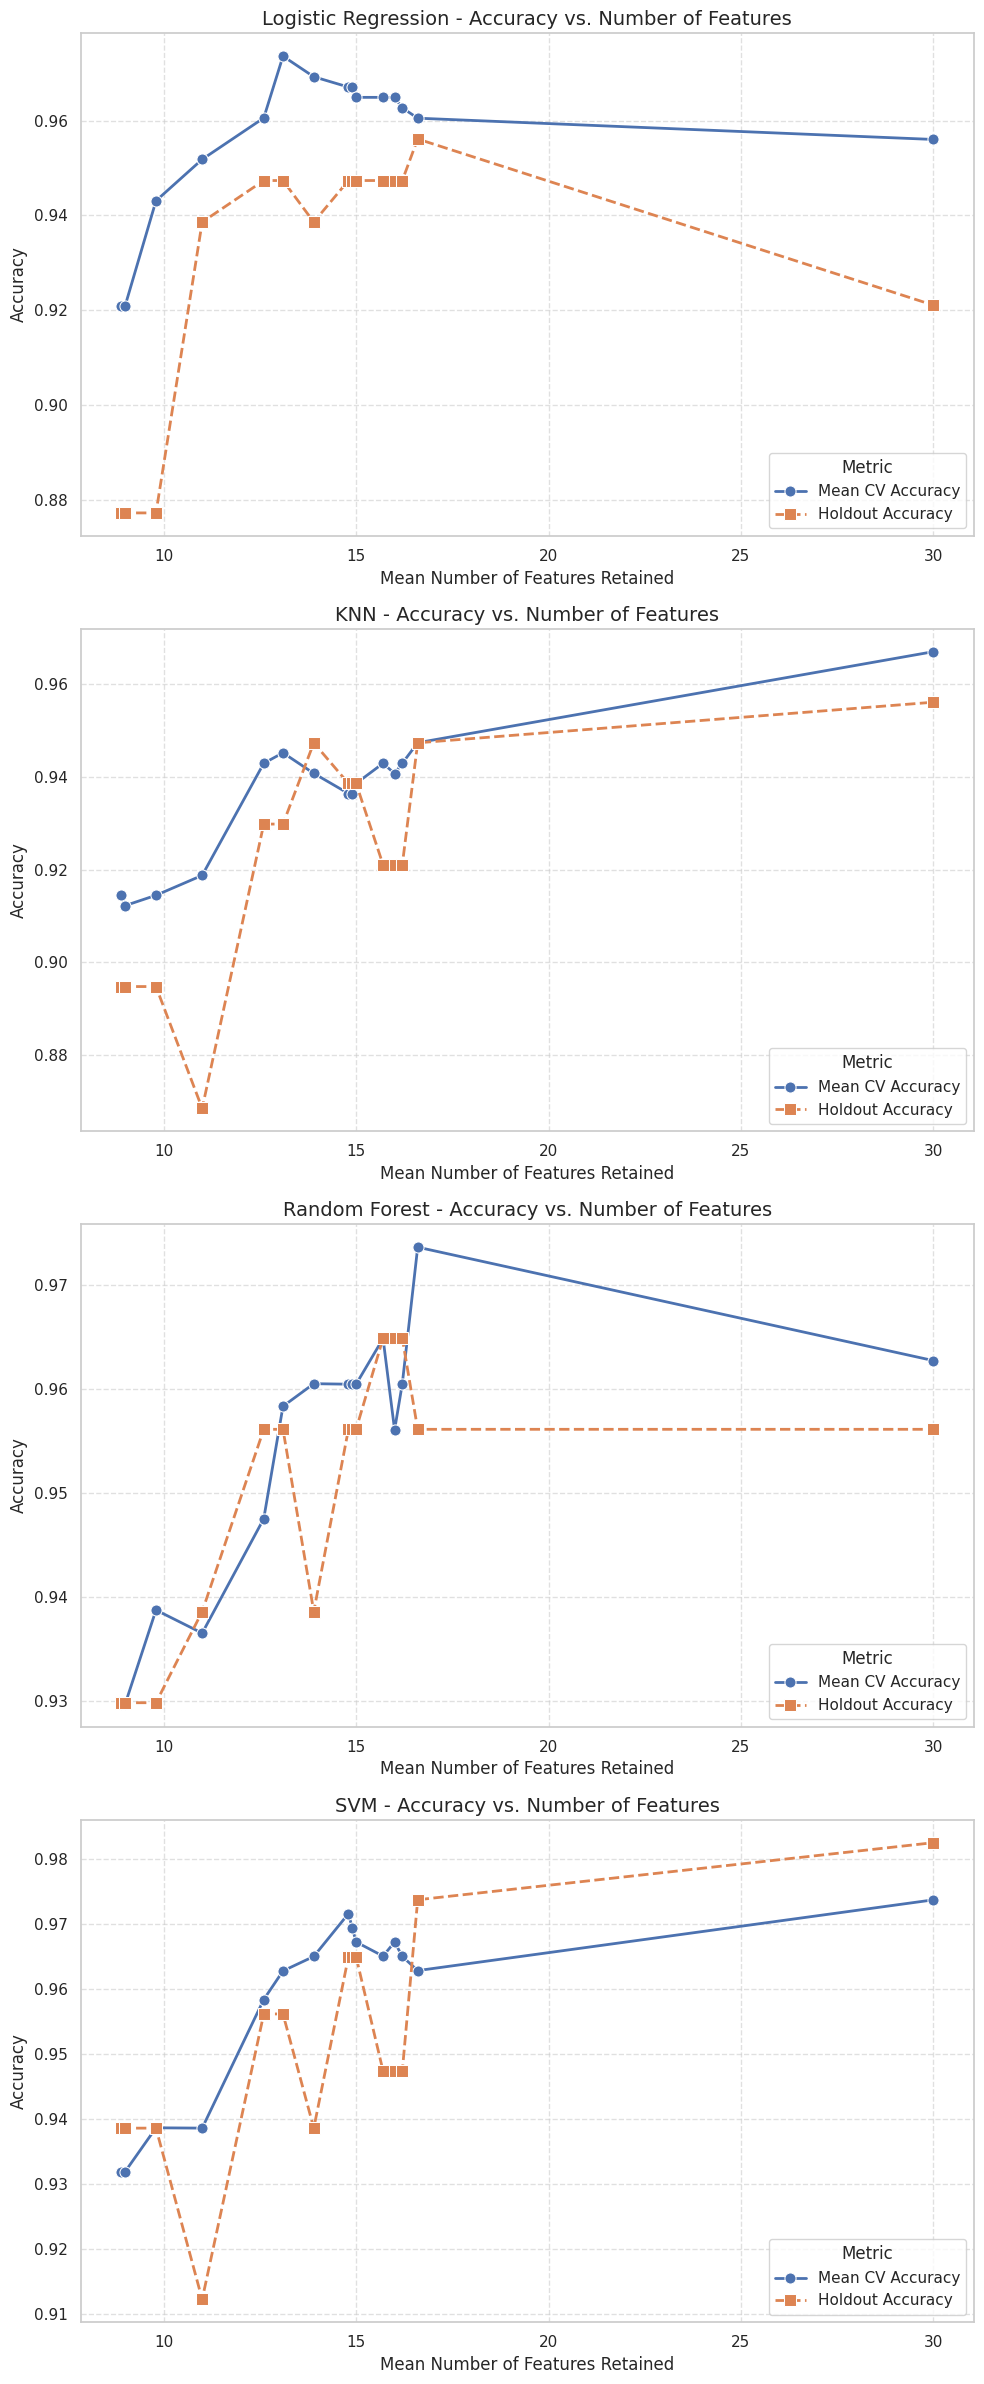

In [ ]:
plot_vif_cv_results(
    df=vif_results,
    classifiers=classifiers_to_plot,
    x="Mean # Features",
    y1="Mean CV Accuracy",
    y2="Holdout Accuracy",
    title_part="Accuracy",
    xlabel="Mean Number of Features Retained",
    ylabel="Accuracy"
)

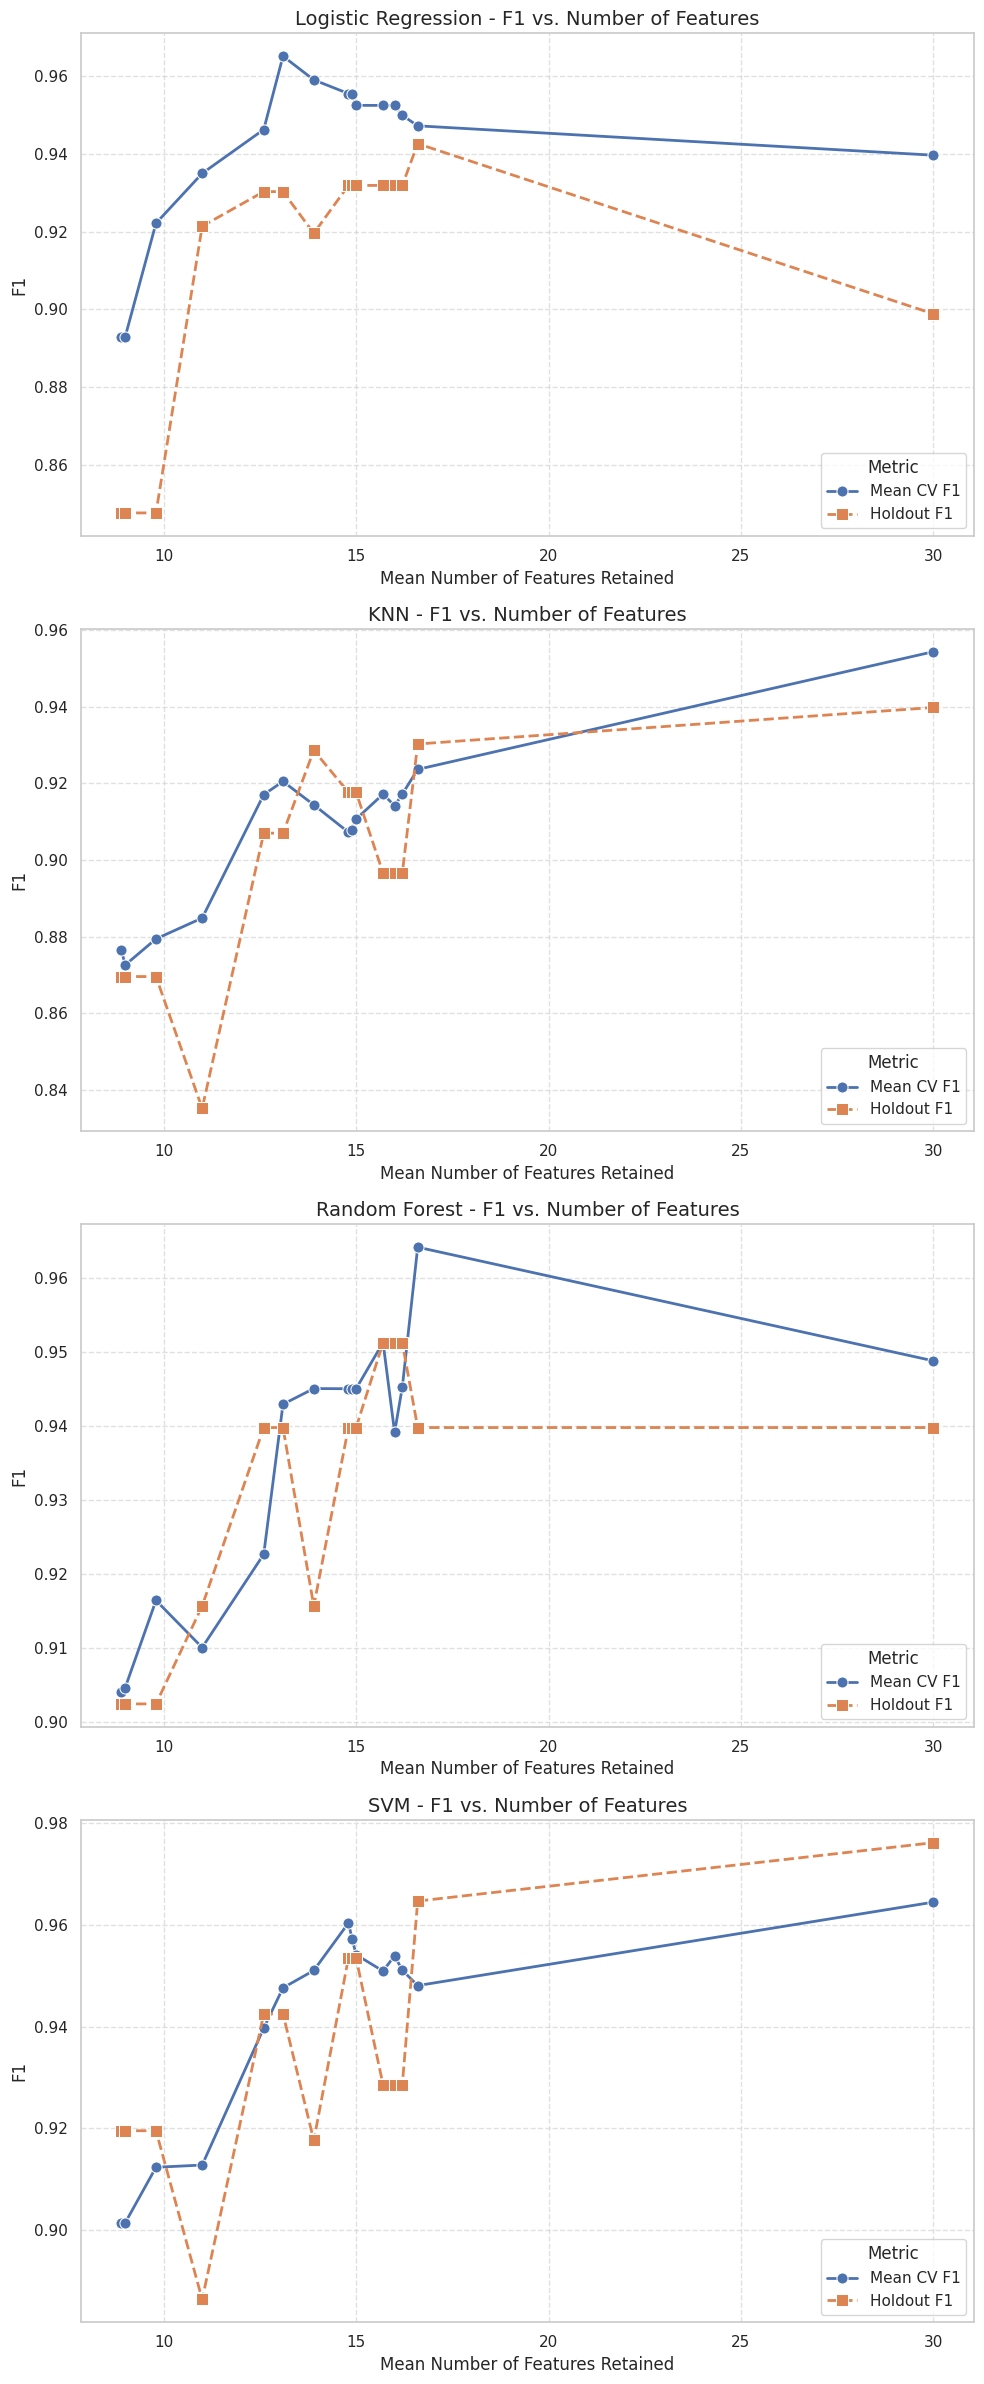

In [ ]:
plot_vif_cv_results(
    df=vif_results,
    classifiers=classifiers_to_plot,
    x="Mean # Features",
    y1="Mean CV F1",
    y2="Holdout F1",
    title_part="F1",
    xlabel="Mean Number of Features Retained",
    ylabel="F1"
)

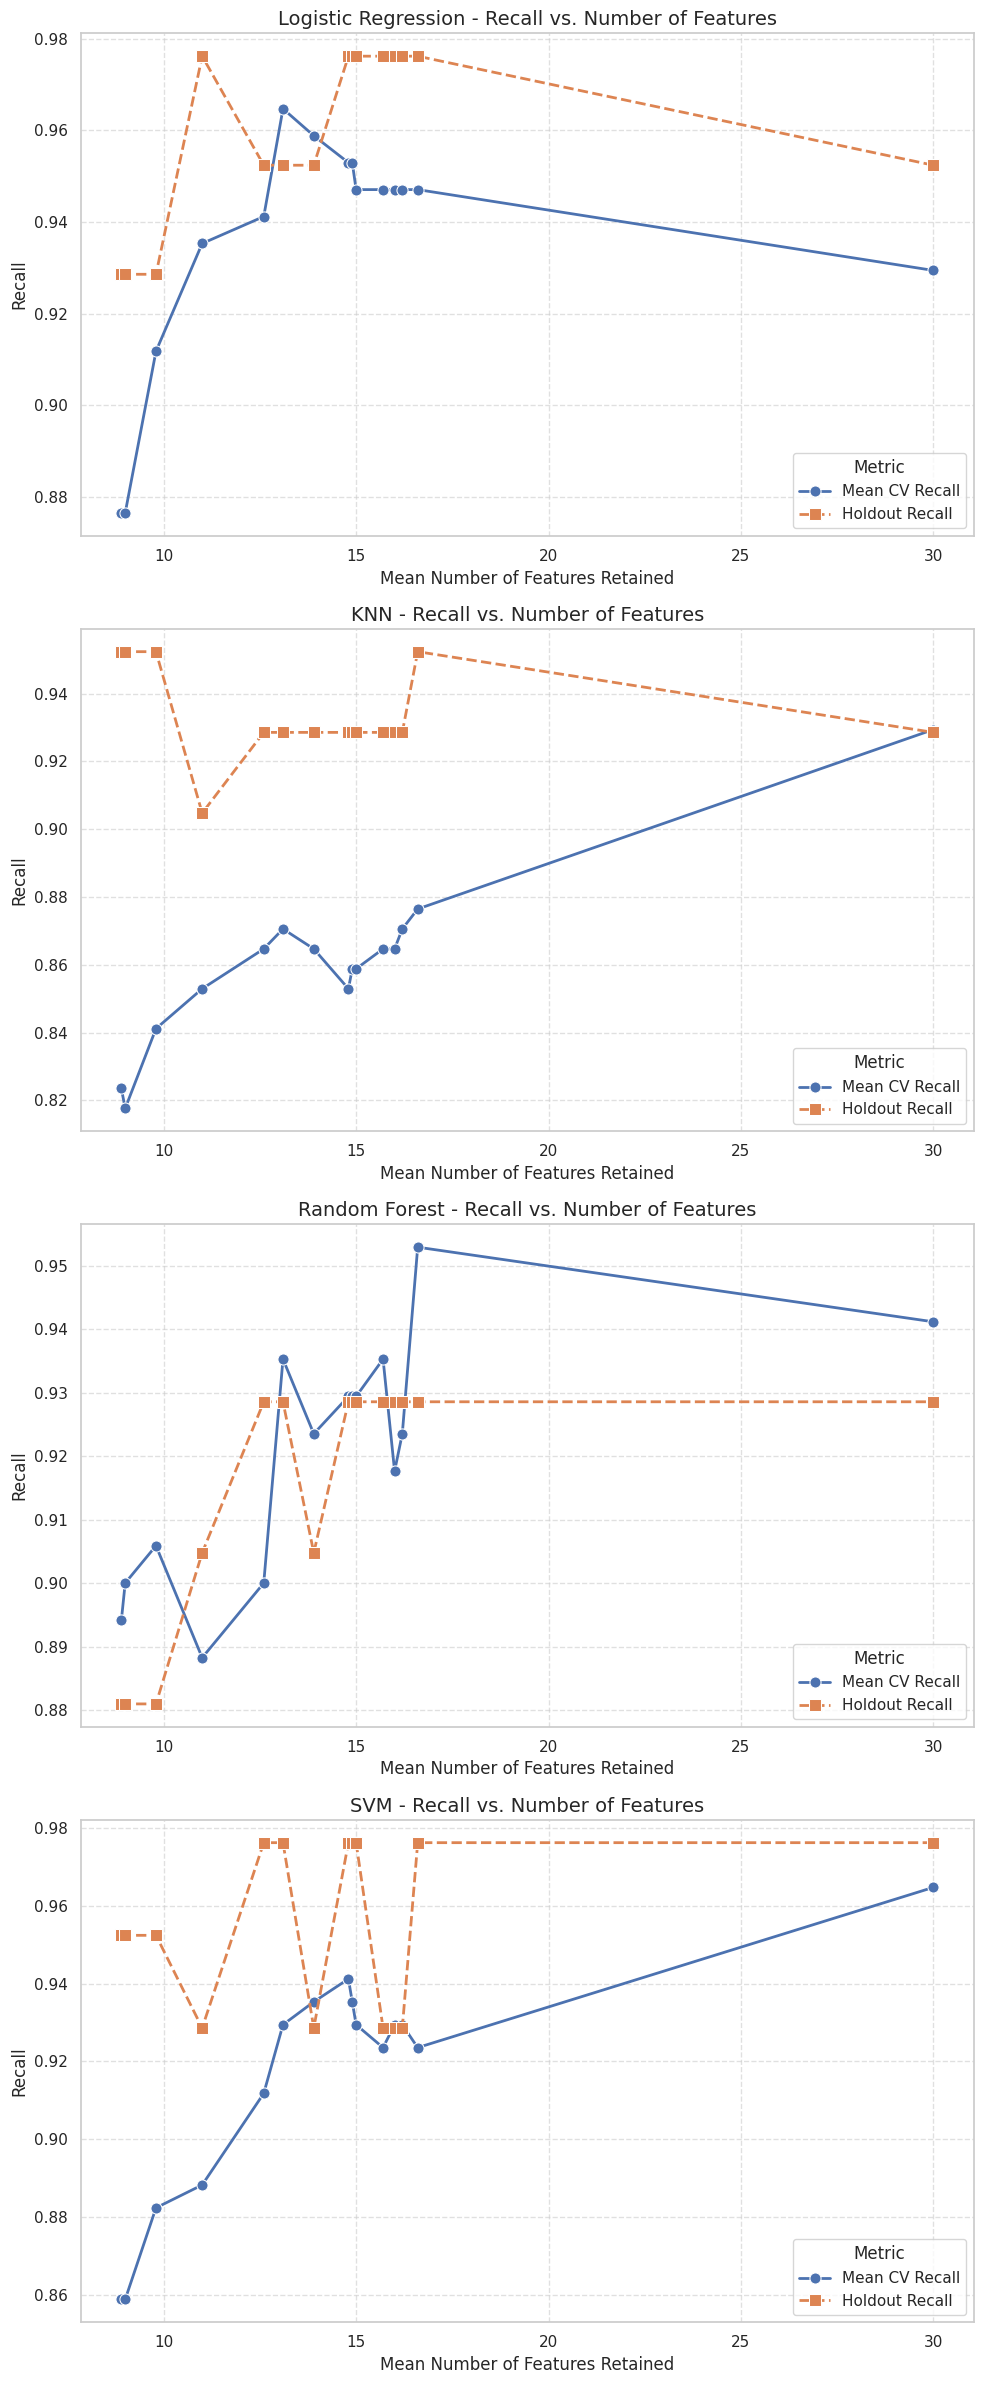

In [ ]:
plot_vif_cv_results(
    df=vif_results,
    classifiers=classifiers_to_plot,
    x="Mean # Features",
    y1="Mean CV Recall",
    y2="Holdout Recall",
    title_part="Recall",
    xlabel="Mean Number of Features Retained",
    ylabel="Recall"
)